In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns

In [2]:
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\Acer\Documents\data work freetime\property_and_crime


# Load dataset(s)

In [4]:
# Current folder since you're already inside property_and_crime
data_folder = '.'

In [5]:
sheets_to_load = {
    'JadualTransaksiSelangorLPH2021.xls': '4.5',
    'JadualTransaksiSelangorLPH2022.xls': '4.5',
    'JadualTransaksiSelangorLPH2023.xls': '1.5'
}

loaded_data = {}

for file_name, sheet in sheets_to_load.items():
    file_path = os.path.join(data_folder, file_name)
    try:
        df = pd.read_excel(file_path, sheet_name=sheet)
        loaded_data[file_name] = df
        print(f"✅ Loaded '{sheet}' from {file_name}")
    except Exception as e:
        print(f"❌ Failed to load '{sheet}' from {file_name}: {e}")

✅ Loaded '4.5' from JadualTransaksiSelangorLPH2021.xls
✅ Loaded '4.5' from JadualTransaksiSelangorLPH2022.xls
✅ Loaded '1.5' from JadualTransaksiSelangorLPH2023.xls


# cleaning data set 1 df_2021

In [7]:
df_2021 = loaded_data['JadualTransaksiSelangorLPH2021.xls']

In [8]:
df_2021.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,Table 4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Breakdown Of Number Of Residential Property Tr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Property Type,PRICE RANGE,YEAR,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Vacant Plot,"0 - 100,000",2020,30,121,17,22,40,98,203,35,37,603
6,NaN,NaN,NaN,2021,3,159,303,24,160,42,54,83,62,890
7,NaN,NaN,"100,001 - 200,000",NaN,225,126,48,8,12,70,59,84,136,768
8,NaN,NaN,NaN,NaN,25,108,215,20,17,53,48,170,176,832
9,NaN,NaN,"200,001 - 300,000",NaN,45,45,12,13,10,43,34,65,142,409


In [9]:
df_2021.tail(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
334,NaN,NaN,"200,001 - 300,000",NaN,1871,1216,380,313,90,914,529,1671,370,7354
335,NaN,NaN,NaN,NaN,2017,1082,376,309,95,945,614,1833,420,7691
336,NaN,NaN,"300,001 - 400,000",NaN,1643,1516,460,214,82,772,201,1452,419,6759
337,NaN,NaN,NaN,NaN,1802,1604,715,321,51,769,241,1596,375,7474
338,NaN,NaN,"400,001 - 500,000",NaN,1025,837,505,339,18,534,188,1040,428,4914
339,NaN,NaN,NaN,NaN,1210,912,681,375,37,613,214,1325,508,5875
340,NaN,NaN,"500,001 - 600,000",NaN,869,683,123,515,16,371,46,889,476,3988
341,NaN,NaN,NaN,NaN,939,693,207,402,12,430,67,953,488,4191
342,NaN,NaN,"600,001 - 700,000",NaN,846,491,108,99,12,297,25,726,387,2991
343,NaN,NaN,NaN,NaN,983,527,150,130,13,274,17,856,338,3288


In [10]:
df_2021 = df_2021.dropna(axis=1, how='all')

In [11]:
df_2021 = df_2021.dropna(how='all')

In [12]:
df_2021.head(10)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Table 4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Breakdown Of Number Of Residential Property Tr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Property Type,PRICE RANGE,YEAR,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
5,Vacant Plot,"0 - 100,000",2020,30,121,17,22,40,98,203,35,37,603
6,NaN,NaN,2021,3,159,303,24,160,42,54,83,62,890
7,NaN,"100,001 - 200,000",NaN,225,126,48,8,12,70,59,84,136,768
8,NaN,NaN,NaN,25,108,215,20,17,53,48,170,176,832
9,NaN,"200,001 - 300,000",NaN,45,45,12,13,10,43,34,65,142,409
10,NaN,NaN,NaN,44,43,34,8,14,66,22,70,141,442
11,NaN,"300,001 - 400,000",NaN,17,11,6,5,6,29,13,49,65,201


In [13]:
new_header21 = df_2021.iloc[2] 

In [14]:
df_2021 = df_2021[3:] 

In [15]:
df_2021.columns = new_header21

In [16]:
df_2021.head(5)

3,Property Type,PRICE RANGE,YEAR,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
5,Vacant Plot,"0 - 100,000",2020,30,121,17,22,40,98,203,35,37,603
6,NaN,NaN,2021,3,159,303,24,160,42,54,83,62,890
7,NaN,"100,001 - 200,000",NaN,225,126,48,8,12,70,59,84,136,768
8,NaN,NaN,NaN,25,108,215,20,17,53,48,170,176,832
9,NaN,"200,001 - 300,000",NaN,45,45,12,13,10,43,34,65,142,409


In [17]:
print(df_2021.columns.tolist())

['Property Type ', 'PRICE RANGE', 'YEAR', 'Petaling', 'Klang', 'Kuala Langat', 'Kuala Selangor', 'Sabak Bernam', 'Gombak', 'Hulu Selangor', 'Hulu Langat', 'Sepang', 'Total']


In [18]:
#to remove space at the end of Type '
df_2021.columns = df_2021.columns.str.strip()

In [19]:
print(df_2021.columns.tolist())

['Property Type', 'PRICE RANGE', 'YEAR', 'Petaling', 'Klang', 'Kuala Langat', 'Kuala Selangor', 'Sabak Bernam', 'Gombak', 'Hulu Selangor', 'Hulu Langat', 'Sepang', 'Total']


In [20]:
df_2021[['Property Type', 'PRICE RANGE', 'YEAR']] = df_2021[['Property Type', 'PRICE RANGE', 'YEAR']].ffill()

In [21]:
df_2021.head(20)

3,Property Type,PRICE RANGE,YEAR,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
5,Vacant Plot,"0 - 100,000",2020,30,121,17,22,40,98,203,35,37,603
6,Vacant Plot,"0 - 100,000",2021,3,159,303,24,160,42,54,83,62,890
7,Vacant Plot,"100,001 - 200,000",2021,225,126,48,8,12,70,59,84,136,768
8,Vacant Plot,"100,001 - 200,000",2021,25,108,215,20,17,53,48,170,176,832
9,Vacant Plot,"200,001 - 300,000",2021,45,45,12,13,10,43,34,65,142,409
10,Vacant Plot,"200,001 - 300,000",2021,44,43,34,8,14,66,22,70,141,442
11,Vacant Plot,"300,001 - 400,000",2021,17,11,6,5,6,29,13,49,65,201
12,Vacant Plot,"300,001 - 400,000",2021,18,22,6,11,5,28,12,68,60,230
13,Vacant Plot,"400,001 - 500,000",2021,10,7,4,2,1,15,32,49,26,146
14,Vacant Plot,"400,001 - 500,000",2021,62,11,4,3,2,17,3,49,29,180


In [22]:
df_2021 = df_2021[df_2021['YEAR'].notna()].copy()

In [23]:
# Convert YEAR to string and strip spaces
df_2021['YEAR'] = df_2021['YEAR'].astype(str)

In [24]:
def fix_years(group):
    # Get the number of rows in the group
    n = len(group)
    # Assign years based on number of rows: cycle from 2020 onward
    group = group.copy()
    group['YEAR'] = list(range(2020, 2020 + n))
    return group

In [25]:
# Apply fixing per group
df_2021 = df_2021.groupby(['Property Type', 'PRICE RANGE'], group_keys=False).apply(fix_years)

In [26]:
df_2021.head(20)

3,Property Type,PRICE RANGE,YEAR,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
5,Vacant Plot,"0 - 100,000",2020,30,121,17,22,40,98,203,35,37,603
6,Vacant Plot,"0 - 100,000",2021,3,159,303,24,160,42,54,83,62,890
7,Vacant Plot,"100,001 - 200,000",2020,225,126,48,8,12,70,59,84,136,768
8,Vacant Plot,"100,001 - 200,000",2021,25,108,215,20,17,53,48,170,176,832
9,Vacant Plot,"200,001 - 300,000",2020,45,45,12,13,10,43,34,65,142,409
10,Vacant Plot,"200,001 - 300,000",2021,44,43,34,8,14,66,22,70,141,442
11,Vacant Plot,"300,001 - 400,000",2020,17,11,6,5,6,29,13,49,65,201
12,Vacant Plot,"300,001 - 400,000",2021,18,22,6,11,5,28,12,68,60,230
13,Vacant Plot,"400,001 - 500,000",2020,10,7,4,2,1,15,32,49,26,146
14,Vacant Plot,"400,001 - 500,000",2021,62,11,4,3,2,17,3,49,29,180


In [27]:
df_2021.tail(30)

3,Property Type,PRICE RANGE,YEAR,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
323,Others,"900,001 - 1,000,000",2020,0,0,0,0,0,0,0,0,0,0
324,Others,"900,001 - 1,000,000",2021,0,0,0,0,0,0,0,0,0,0
325,Others,"1,000,001 & Above",2020,0,0,0,0,0,0,0,0,0,0
326,Others,"1,000,001 & Above",2021,1,0,0,0,0,0,0,0,0,1
327,Others,Total,2020,0,0,0,0,0,0,0,0,0,0
328,Others,Total,2021,1,0,0,0,0,0,0,8,0,9
330,Total,"0 - 100,000",2020,303,527,78,131,75,361,739,577,137,2928
331,Total,"0 - 100,000",2021,210,458,352,125,189,243,433,527,115,2652
332,Total,"100,001 - 200,000",2020,2367,1084,320,333,115,850,672,1549,514,7804
333,Total,"100,001 - 200,000",2021,2149,1114,433,306,104,829,595,1618,499,7647


In [28]:
# Select last 2 rows (usually totals)
df_2021 = df_2021.tail(2).copy()

In [29]:
df_2021.head(10)

3,Property Type,PRICE RANGE,YEAR,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
352,Total,Total,2020,12056,7428,2106,2166,428,4723,2430,9444,3253,44034
353,Total,Total,2021,13380,8006,3245,2170,514,5009,2244,10610,3577,48755


# cleaning data set 2 df_2022

In [31]:
df_2022 = loaded_data['JadualTransaksiSelangorLPH2022.xls']

In [32]:
df_2022.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Table 4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Breakdown Of Number Of Residential Property Tr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Property Type,Price Range,Year,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Vacant Plot,"0 - 100,000",2021,3,159,303,24,160,42,54,83,62,890
7,NaN,NaN,NaN,2022,11,202,189,54,77,47,60,48,21,709
8,NaN,NaN,"100,001 - 200,000",NaN,25,108,215,20,17,53,48,170,176,832
9,NaN,NaN,NaN,NaN,21,62,76,26,7,96,66,303,179,836


In [33]:
df_2022 = df_2022.dropna(axis=1, how='all')

In [34]:
df_2022 = df_2022.dropna(how='all')

In [35]:
df_2022.head(5)

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
1,Table 4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Breakdown Of Number Of Residential Property Tr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Property Type,Price Range,Year,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
6,Vacant Plot,"0 - 100,000",2021,3,159,303,24,160,42,54,83,62,890
7,NaN,NaN,2022,11,202,189,54,77,47,60,48,21,709


In [36]:
new_header22 = df_2022.iloc[2] 

In [37]:
df_2022 = df_2022[3:]

In [38]:
df_2022.columns = new_header22

In [39]:
df_2022.head(10)

4,Property Type,Price Range,Year,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
6,Vacant Plot,"0 - 100,000",2021,3,159,303,24,160,42,54,83,62,890
7,NaN,NaN,2022,11,202,189,54,77,47,60,48,21,709
8,NaN,"100,001 - 200,000",NaN,25,108,215,20,17,53,48,170,176,832
9,NaN,NaN,NaN,21,62,76,26,7,96,66,303,179,836
10,NaN,"200,001 - 300,000",NaN,44,43,34,8,14,66,22,70,141,442
11,NaN,NaN,NaN,22,54,23,30,15,72,32,112,150,510
12,NaN,"300,001 - 400,000",NaN,18,22,6,11,5,28,12,68,60,230
13,NaN,NaN,NaN,27,11,10,29,2,29,18,73,80,279
14,NaN,"400,001 - 500,000",NaN,62,11,4,3,2,17,3,49,29,180
15,NaN,NaN,NaN,23,15,17,7,4,19,6,54,35,180


In [40]:
#to remove space at the end of Type '
df_2022.columns = df_2022.columns.str.strip()

In [41]:
print(df_2021.columns.tolist())

['Property Type', 'PRICE RANGE', 'YEAR', 'Petaling', 'Klang', 'Kuala Langat', 'Kuala Selangor', 'Sabak Bernam', 'Gombak', 'Hulu Selangor', 'Hulu Langat', 'Sepang', 'Total']


In [42]:
df_2022[['Property Type', 'Price Range', 'Year']] = df_2022[['Property Type', 'Price Range', 'Year']].ffill()

In [43]:
df_2022 = df_2022[df_2022['Year'].notna()].copy()

In [44]:
# Convert YEAR to string and strip spaces
df_2022['Year'] = df_2022['Year'].astype(str)

In [45]:
def fix_years(group):
    # Get the number of rows in the group
    n = len(group)
    # Assign years based on number of rows: cycle from 2020 onward
    group = group.copy()
    group['Year'] = list(range(2021, 2021 + n))
    return group

In [46]:
# Apply fixing per group
df_2022 = df_2022.groupby(['Property Type', 'Price Range'], group_keys=False).apply(fix_years)

In [47]:
df_2022.tail(10)

4,Property Type,Price Range,Year,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
357,Total,"700,001 - 800,000",2021,810,708,123,44,11,195,34,446,135,2506
358,Total,"700,001 - 800,000",2022,939,762,120,147,16,263,18,554,193,3012
359,Total,"800,001 - 900,000",2021,602,213,77,28,1,112,20,362,138,1553
360,Total,"800,001 - 900,000",2022,825,277,92,101,3,178,48,332,123,1979
361,Total,"900,001 - 1,000,000",2021,418,153,25,43,0,78,6,266,93,1082
362,Total,"900,001 - 1,000,000",2022,561,171,34,37,1,131,13,232,99,1279
363,Total,"1,000,001 & Above",2021,2240,542,106,87,1,521,3,828,468,4796
364,Total,"1,000,001 & Above",2022,2564,616,178,111,4,602,20,1043,316,5454
365,Total,Total,2021,13380,8006,3245,2170,514,5009,2244,10610,3577,48755
366,Total,Total,2022,15434,9651,2733,2768,498,6968,2639,12466,3357,56514


In [48]:
# Select last 2 rows (usually totals)
df_2022 = df_2022.tail(2).copy()

In [49]:
df_2022.head(5)

4,Property Type,Price Range,Year,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
365,Total,Total,2021,13380,8006,3245,2170,514,5009,2244,10610,3577,48755
366,Total,Total,2022,15434,9651,2733,2768,498,6968,2639,12466,3357,56514


# cleaning data set 3 df_2023

In [51]:
df_2023 = loaded_data['JadualTransaksiSelangorLPH2023.xls']

In [52]:
df_2023.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Table 1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Breakdown Of Number Of Residential Property Tr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Property Type,Price Range,Year,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Vacant Plot,"0 - 100,000",2022,11,202,189,54,77,47,60,48,21,709
7,NaN,NaN,NaN,2023,9,376,271,73,136,93,46,116,156,1276
8,NaN,NaN,"100,001 - 200,000",NaN,21,62,76,26,7,96,66,303,179,836
9,NaN,NaN,NaN,NaN,16,135,105,36,37,83,63,214,299,988


In [53]:
df_2023 = df_2023.dropna(axis=1, how='all')

In [54]:
df_2023 = df_2023.dropna(how='all')

In [55]:
new_header23 = df_2023.iloc[2] 

In [56]:
df_2023 = df_2023[3:] 

In [57]:
df_2023.columns = new_header23

In [58]:
df_2023.head(5)

4,Property Type,Price Range,Year,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
6,Vacant Plot,"0 - 100,000",2022,11,202,189,54,77,47,60,48,21,709
7,NaN,NaN,2023,9,376,271,73,136,93,46,116,156,1276
8,NaN,"100,001 - 200,000",NaN,21,62,76,26,7,96,66,303,179,836
9,NaN,NaN,NaN,16,135,105,36,37,83,63,214,299,988
10,NaN,"200,001 - 300,000",NaN,22,54,23,30,15,72,32,112,150,510


In [59]:
print(df_2023.columns.tolist())

['Property Type', 'Price Range', 'Year', 'Petaling', 'Klang', 'Kuala Langat', 'Kuala Selangor', 'Sabak Bernam', 'Gombak', 'Hulu Selangor', 'Hulu Langat', 'Sepang', 'Total']


In [60]:
df_2023[['Property Type', 'Price Range', 'Year']] = df_2023[['Property Type', 'Price Range', 'Year']].ffill()

In [61]:
df_2023 = df_2023[df_2023['Year'].notna()].copy()

In [62]:
# Convert YEAR to string
df_2023['Year'] = df_2023['Year'].astype(str)

In [63]:
def fix_years(group):
    # Get the number of rows in the group
    n = len(group)
    # Assign years based on number of rows: cycle from 2020 onward
    group = group.copy()
    group['Year'] = list(range(2022, 2022 + n))
    return group

In [64]:
# Apply fixing per group
df_2023 = df_2023.groupby(['Property Type', 'Price Range'], group_keys=False).apply(fix_years)

In [65]:
# Select last 2 rows (usually totals)
df_2023 = df_2023.tail(2).copy()

In [66]:
df_2023.head(5)

4,Property Type,Price Range,Year,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
365,Total,Total,2022,15434,9651,2733,2768,498,6968,2639,12466,3357,56514
366,Total,Total,2023,15963,9628,2864,2467,615,6298,2674,11032,3494,55035


# Combine filtered/cleaned dataset 2021,2022,2023

In [68]:
# 1. Combine the dataframes
combined_df = pd.concat([df_2021, df_2022, df_2023], ignore_index=True)

In [69]:
# 2. Drop the specified columns
combined_df = combined_df.drop(columns=['Property Type', 'PRICE RANGE', 'Price Range', 'Year'])

In [70]:
# 3. (Optional) Preview the result
combined_df.head(10)

,YEAR,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
0,2020.0,12056,7428,2106,2166,428,4723,2430,9444,3253,44034
1,2021.0,13380,8006,3245,2170,514,5009,2244,10610,3577,48755
2,NaN,13380,8006,3245,2170,514,5009,2244,10610,3577,48755
3,NaN,15434,9651,2733,2768,498,6968,2639,12466,3357,56514
4,NaN,15434,9651,2733,2768,498,6968,2639,12466,3357,56514
5,NaN,15963,9628,2864,2467,615,6298,2674,11032,3494,55035


In [71]:
# Manually assign the correct year sequence
combined_df.loc[1:2, 'YEAR'] = 2021
combined_df.loc[3:4, 'YEAR'] = 2022
combined_df.loc[5, 'YEAR'] = 2023

In [72]:
combined_df.head(10)

,YEAR,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
0,2020.0,12056,7428,2106,2166,428,4723,2430,9444,3253,44034
1,2021.0,13380,8006,3245,2170,514,5009,2244,10610,3577,48755
2,2021.0,13380,8006,3245,2170,514,5009,2244,10610,3577,48755
3,2022.0,15434,9651,2733,2768,498,6968,2639,12466,3357,56514
4,2022.0,15434,9651,2733,2768,498,6968,2639,12466,3357,56514
5,2023.0,15963,9628,2864,2467,615,6298,2674,11032,3494,55035


In [73]:
# Drop duplicate rows
combined_df = combined_df.drop_duplicates()

In [74]:
# Convert YEAR to int (cleaner)
combined_df['YEAR'] = combined_df['YEAR'].astype(int)

In [75]:
combined_df.head(10)

,YEAR,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
0,2020,12056,7428,2106,2166,428,4723,2430,9444,3253,44034
1,2021,13380,8006,3245,2170,514,5009,2244,10610,3577,48755
3,2022,15434,9651,2733,2768,498,6968,2639,12466,3357,56514
5,2023,15963,9628,2864,2467,615,6298,2674,11032,3494,55035


# Load crime dataset

In [77]:
crime_df = pd.read_csv('crime_district.csv')

In [78]:
crime_df.head(10)

,state,district,category,type,date,crimes
0,Malaysia,All,assault,all,2016-01-01,22327
1,Malaysia,All,assault,all,2017-01-01,21366
2,Malaysia,All,assault,all,2018-01-01,16902
3,Malaysia,All,assault,all,2019-01-01,16489
4,Malaysia,All,assault,all,2020-01-01,13279
5,Malaysia,All,assault,all,2021-01-01,11495
6,Malaysia,All,assault,all,2022-01-01,10348
7,Malaysia,All,assault,all,2023-01-01,10453
8,Malaysia,All,assault,causing_injury,2016-01-01,5531
9,Malaysia,All,assault,causing_injury,2017-01-01,5024


# Filtering and Sorting the crime_df

In [80]:
print(crime_df.dtypes)

state       object
district    object
category    object
type        object
date        object
crimes       int64
dtype: object


In [81]:
print(crime_df.columns.tolist())

['state', 'district', 'category', 'type', 'date', 'crimes']


In [82]:
# Convert to datetime if it's not already
crime_df['date'] = pd.to_datetime(crime_df['date'], errors='coerce')

In [83]:
print(crime_df.dtypes)

state               object
district            object
category            object
type                object
date        datetime64[ns]
crimes               int64
dtype: object


In [84]:
# Extract year
crime_df['year'] = crime_df['date'].dt.year

# Then filter by year too
filtered_crime_df = crime_df[
    (crime_df['state'] == 'Selangor') &
    (crime_df['category'].str.lower() == 'property') &
    (crime_df['type'].str.lower() == 'break_in') &
    (crime_df['year'].isin([2020, 2021, 2022, 2023]))  
]

In [85]:
filtered_crime_df.head(10)

,state,district,category,type,date,crimes,year
15756,Selangor,All,property,break_in,2020-01-01,3025,2020
15757,Selangor,All,property,break_in,2021-01-01,2801,2021
15758,Selangor,All,property,break_in,2022-01-01,2415,2022
15759,Selangor,All,property,break_in,2023-01-01,2713,2023
15868,Selangor,Ampang Jaya,property,break_in,2020-01-01,300,2020
15869,Selangor,Ampang Jaya,property,break_in,2021-01-01,192,2021
15870,Selangor,Ampang Jaya,property,break_in,2022-01-01,159,2022
15871,Selangor,Ampang Jaya,property,break_in,2023-01-01,223,2023
15980,Selangor,Gombak,property,break_in,2020-01-01,367,2020
15981,Selangor,Gombak,property,break_in,2021-01-01,387,2021


In [86]:
filtered_crime_df.tail(10)

,state,district,category,type,date,crimes,year
17283,Selangor,Shah Alam,property,break_in,2021-01-01,149,2021
17284,Selangor,Shah Alam,property,break_in,2022-01-01,90,2022
17285,Selangor,Shah Alam,property,break_in,2023-01-01,119,2023
17394,Selangor,Subang Jaya,property,break_in,2020-01-01,168,2020
17395,Selangor,Subang Jaya,property,break_in,2021-01-01,127,2021
17396,Selangor,Subang Jaya,property,break_in,2022-01-01,123,2022
17397,Selangor,Subang Jaya,property,break_in,2023-01-01,203,2023
17457,Selangor,Sungai Buloh,property,break_in,2021-01-01,114,2021
17458,Selangor,Sungai Buloh,property,break_in,2022-01-01,123,2022
17459,Selangor,Sungai Buloh,property,break_in,2023-01-01,188,2023


In [87]:
# Sort districts/areas in accordance to the property transaction data districts 
district_mapping = {
    'Petaling Jaya': 'Petaling',
    'Shah Alam': 'Petaling',
    'Subang Jaya': 'Petaling',
    'Serdang': 'Petaling',
    'Sungai Buloh': 'Petaling',
    'Sg. Buloh': 'Petaling',
    
    'Klang Selatan': 'Klang',
    'Klang Utara': 'Klang',
    
    'Kuala Langat': 'Kuala Langat',
    'Kuala Selangor': 'Kuala Selangor',
    'Sabak Bernam': 'Sabak Bernam',
    
    'Gombak': 'Gombak',
    
    'Hulu Selangor': 'Hulu Selangor',
    
    'Kajang': 'Hulu Langat',
    'Ampang Jaya': 'Hulu Langat',
    
    'Sepang': 'Sepang',
    
    'All': None  # Or remove later
}

In [88]:
filtered_crime_df = filtered_crime_df.copy()  # Avoid SettingWithCopyWarning
filtered_crime_df['district'] = filtered_crime_df['district'].replace(district_mapping)

In [89]:
filtered_crime_df = filtered_crime_df.dropna(subset=['district'])

In [90]:
filtered_crime_df.head(10)

,state,district,category,type,date,crimes,year
15868,Selangor,Hulu Langat,property,break_in,2020-01-01,300,2020
15869,Selangor,Hulu Langat,property,break_in,2021-01-01,192,2021
15870,Selangor,Hulu Langat,property,break_in,2022-01-01,159,2022
15871,Selangor,Hulu Langat,property,break_in,2023-01-01,223,2023
15980,Selangor,Gombak,property,break_in,2020-01-01,367,2020
15981,Selangor,Gombak,property,break_in,2021-01-01,387,2021
15982,Selangor,Gombak,property,break_in,2022-01-01,336,2022
15983,Selangor,Gombak,property,break_in,2023-01-01,377,2023
16092,Selangor,Hulu Selangor,property,break_in,2020-01-01,147,2020
16093,Selangor,Hulu Selangor,property,break_in,2021-01-01,113,2021


filtered_crime_df.to_csv('filtered_crime.csv', index=False)

In [92]:
# Drop the 'date' column
print(filtered_crime_df.columns.tolist())

['state', 'district', 'category', 'type', 'date', 'crimes', 'year']


In [93]:
#to drop 'date' column
filtered_crime_df = filtered_crime_df.drop(columns=['date'])

In [94]:
#to remove the index (16206 etc) from the dataframe 
filtered_crime_df = filtered_crime_df.reset_index(drop=True)

In [95]:
filtered_crime_df.head(10)

,state,district,category,type,crimes,year
0,Selangor,Hulu Langat,property,break_in,300,2020
1,Selangor,Hulu Langat,property,break_in,192,2021
2,Selangor,Hulu Langat,property,break_in,159,2022
3,Selangor,Hulu Langat,property,break_in,223,2023
4,Selangor,Gombak,property,break_in,367,2020
5,Selangor,Gombak,property,break_in,387,2021
6,Selangor,Gombak,property,break_in,336,2022
7,Selangor,Gombak,property,break_in,377,2023
8,Selangor,Hulu Selangor,property,break_in,147,2020
9,Selangor,Hulu Selangor,property,break_in,113,2021


# Recheck dataframe for property transactions/crime

In [97]:
combined_df.info()
combined_df.describe()
print(combined_df.dtypes)
print(combined_df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 0 to 5
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   YEAR            4 non-null      int32 
 1   Petaling        4 non-null      object
 2   Klang           4 non-null      object
 3   Kuala Langat    4 non-null      object
 4   Kuala Selangor  4 non-null      object
 5   Sabak Bernam    4 non-null      object
 6   Gombak          4 non-null      object
 7   Hulu Selangor   4 non-null      object
 8   Hulu Langat     4 non-null      object
 9   Sepang          4 non-null      object
 10  Total           4 non-null      object
dtypes: int32(1), object(10)
memory usage: 368.0+ bytes
YEAR               int32
Petaling          object
Klang             object
Kuala Langat      object
Kuala Selangor    object
Sabak Bernam      object
Gombak            object
Hulu Selangor     object
Hulu Langat       object
Sepang            object
Total             object
d

In [98]:
combined_df.head()

,YEAR,Petaling,Klang,Kuala Langat,Kuala Selangor,Sabak Bernam,Gombak,Hulu Selangor,Hulu Langat,Sepang,Total
0,2020,12056,7428,2106,2166,428,4723,2430,9444,3253,44034
1,2021,13380,8006,3245,2170,514,5009,2244,10610,3577,48755
3,2022,15434,9651,2733,2768,498,6968,2639,12466,3357,56514
5,2023,15963,9628,2864,2467,615,6298,2674,11032,3494,55035


In [99]:
filtered_crime_df.info()
filtered_crime_df.describe()
print(filtered_crime_df.dtypes)
print(filtered_crime_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   state     60 non-null     object
 1   district  60 non-null     object
 2   category  60 non-null     object
 3   type      60 non-null     object
 4   crimes    60 non-null     int64 
 5   year      60 non-null     int32 
dtypes: int32(1), int64(1), object(4)
memory usage: 2.7+ KB
state       object
district    object
category    object
type        object
crimes       int64
year         int32
dtype: object
(60, 6)


In [100]:
filtered_crime_df.head()

,state,district,category,type,crimes,year
0,Selangor,Hulu Langat,property,break_in,300,2020
1,Selangor,Hulu Langat,property,break_in,192,2021
2,Selangor,Hulu Langat,property,break_in,159,2022
3,Selangor,Hulu Langat,property,break_in,223,2023
4,Selangor,Gombak,property,break_in,367,2020


## Reshape the dataframe for property transactions

In [102]:
melted_property = combined_df.melt(
    id_vars=['YEAR'],
    value_vars=['Petaling', 'Klang', 'Kuala Langat', 'Kuala Selangor', 
                'Sabak Bernam', 'Gombak', 'Hulu Selangor', 'Hulu Langat', 'Sepang'],
    var_name='district',
    value_name='transactions'
)

In [103]:
melted_property.head(5)

,YEAR,district,transactions
0,2020,Petaling,12056
1,2021,Petaling,13380
2,2022,Petaling,15434
3,2023,Petaling,15963
4,2020,Klang,7428


## Aggregate crime data

In [105]:
## Aggregate crime data
agg_crime_df = filtered_crime_df.groupby(['district', 'year'], as_index=False)['crimes'].sum()

In [106]:
agg_crime_df.head(5)

,district,year,crimes
0,Gombak,2020,367
1,Gombak,2021,387
2,Gombak,2022,336
3,Gombak,2023,377
4,Hulu Langat,2020,659


# Merging of both datasets

In [108]:
## Merge with melted property transaction data
merged_df = pd.merge(
    melted_property.rename(columns={'YEAR': 'year'}),
    agg_crime_df[['district', 'year', 'crimes']],
    on=['district', 'year'],
    how='inner'  # or 'left' if you want to keep all property data
)

In [109]:
merged_df.head(10)

,year,district,transactions,crimes
0,2020,Petaling,12056,1103
1,2021,Petaling,13380,824
2,2022,Petaling,15434,819
3,2023,Petaling,15963,1026
4,2020,Klang,7428,464
5,2021,Klang,8006,592
6,2022,Klang,9651,450
7,2023,Klang,9628,430
8,2020,Kuala Langat,2106,33
9,2021,Kuala Langat,3245,80


In [110]:
merged_df.info()
merged_df.describe()
print(merged_df.dtypes)
print(merged_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          36 non-null     int32 
 1   district      36 non-null     object
 2   transactions  36 non-null     object
 3   crimes        36 non-null     int64 
dtypes: int32(1), int64(1), object(2)
memory usage: 1.1+ KB
year             int32
district        object
transactions    object
crimes           int64
dtype: object
(36, 4)


In [111]:
## merged_df.to_csv('merged_df.csv', index=False)

# EDA

## Transactions/Crimes over years (bar graph)

C:\Users\Acer\AppData\Local\Temp\ipykernel_14824\1438659220.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='district_year', y='transactions', palette='viridis')


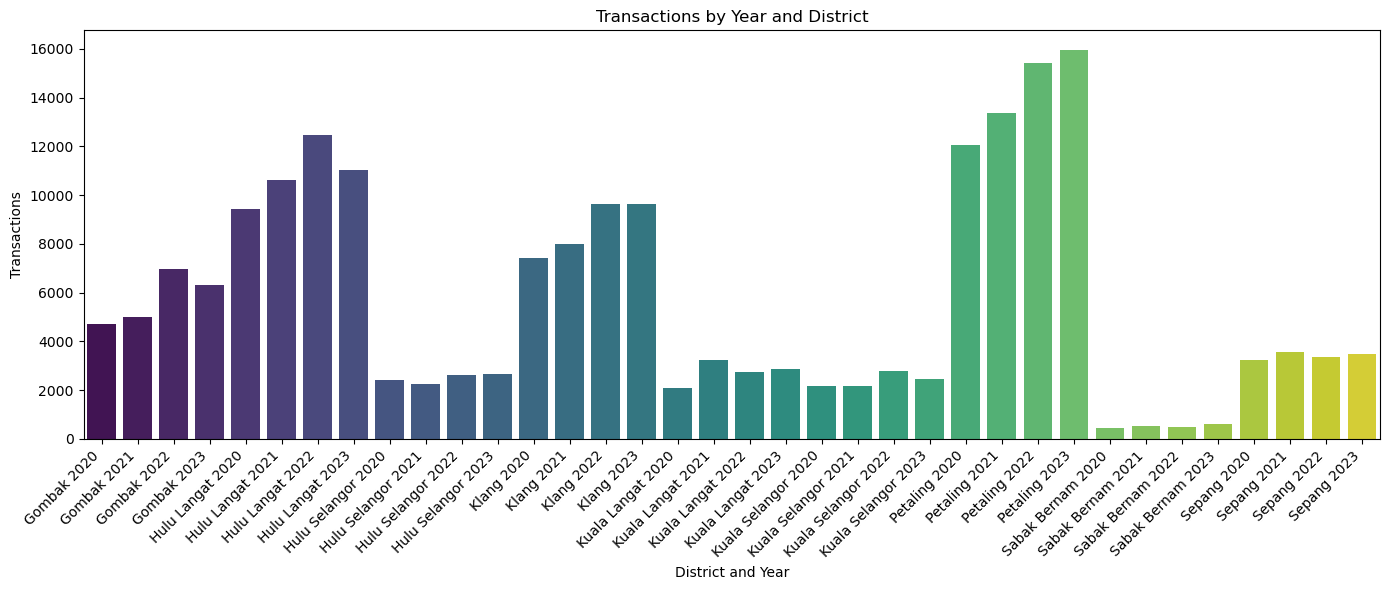

C:\Users\Acer\AppData\Local\Temp\ipykernel_14824\1438659220.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x='district_year', y='crimes', palette='magma')


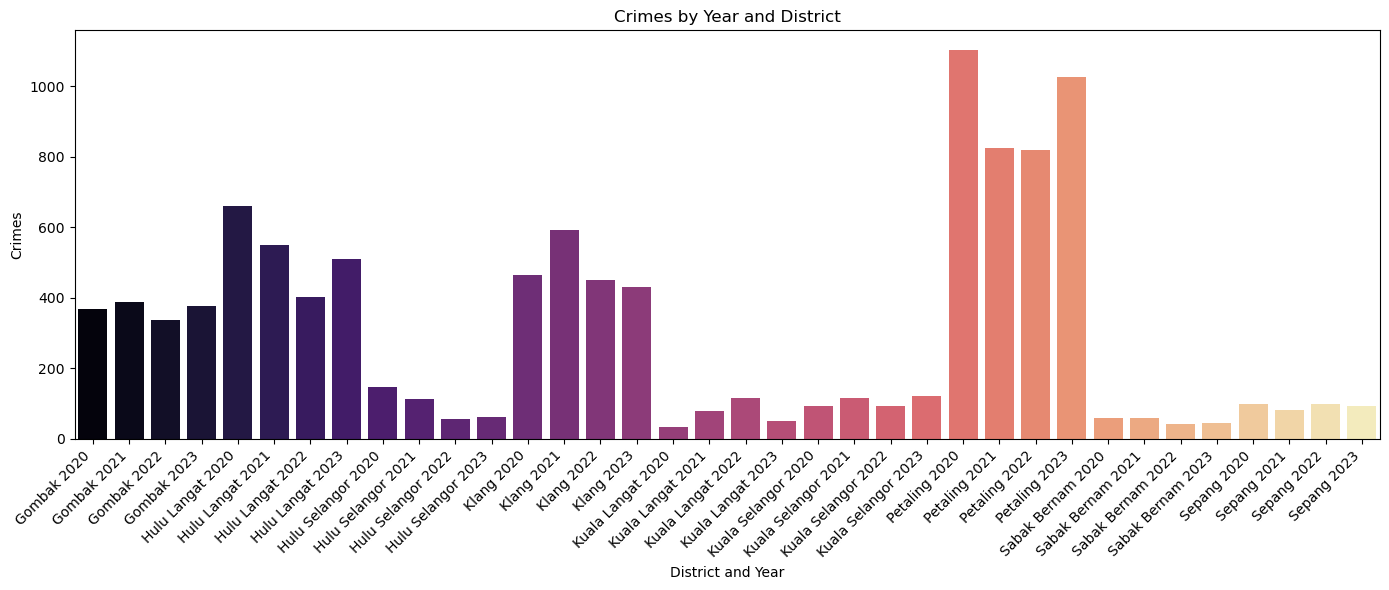

In [114]:
# Create a new column combining district and year
merged_df['district_year'] = merged_df['district'] + ' ' + merged_df['year'].astype(str)

# Sort by district and year for better visual order
merged_df.sort_values(['district', 'year'], inplace=True)

# Plot transactions
plt.figure(figsize=(14, 6))
sns.barplot(data=merged_df, x='district_year', y='transactions', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Transactions by Year and District')
plt.xlabel('District and Year')
plt.ylabel('Transactions')
plt.tight_layout()
plt.show()

# Plot crimes
plt.figure(figsize=(14, 6))
sns.barplot(data=merged_df, x='district_year', y='crimes', palette='magma')
plt.xticks(rotation=45, ha='right')
plt.title('Crimes by Year and District')
plt.xlabel('District and Year')
plt.ylabel('Crimes')
plt.tight_layout()
plt.show()


## Transactions/Crimes over years (Lineplot)

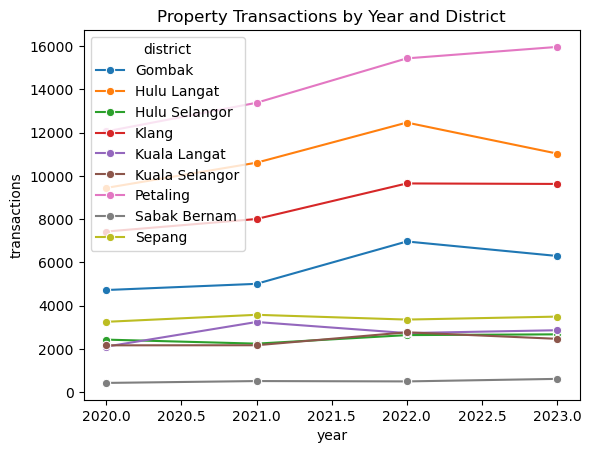

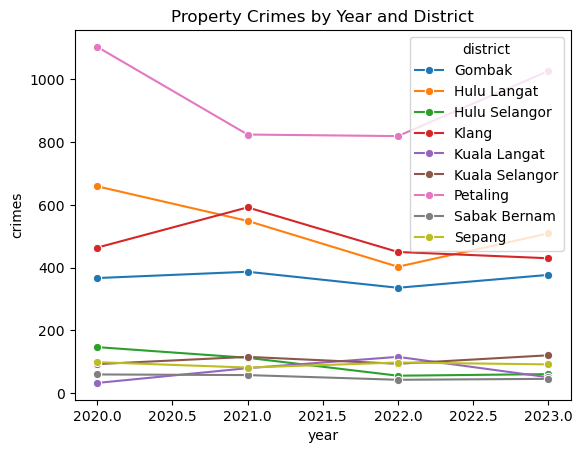

In [116]:
# Transactions over years
sns.lineplot(data=merged_df, x='year', y='transactions', hue='district', marker='o')
plt.title('Property Transactions by Year and District')
plt.show()

# Crimes over years
sns.lineplot(data=merged_df, x='year', y='crimes', hue='district', marker='o')
plt.title('Property Crimes by Year and District')
plt.show()


## Correlation Between Crimes and Transactions

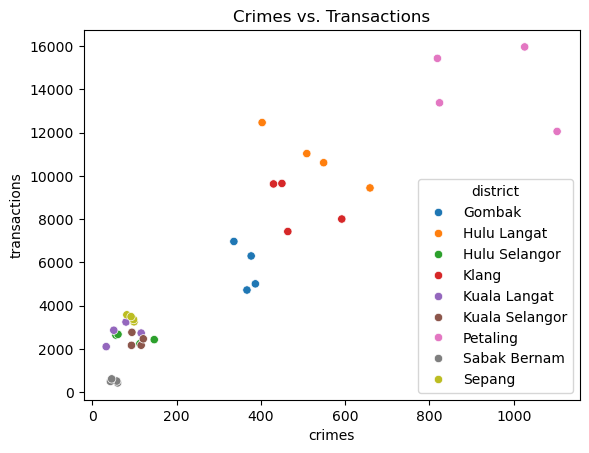

Correlation between crimes and transactions: 0.92


In [118]:
# Correlation plot
sns.scatterplot(data=merged_df, x='crimes', y='transactions', hue='district')
plt.title('Crimes vs. Transactions')
plt.show()

# Correlation coefficient
correlation = merged_df['crimes'].corr(merged_df['transactions'])
print(f"Correlation between crimes and transactions: {correlation:.2f}")


## Heatmap

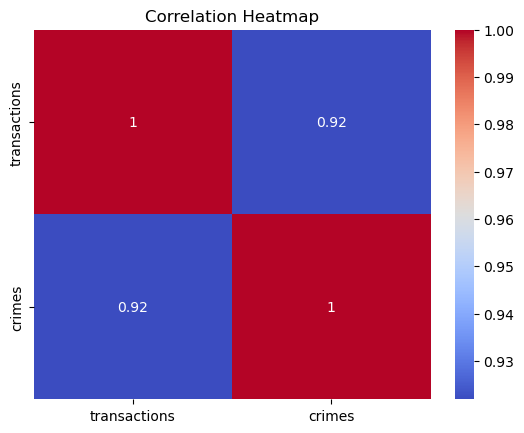

In [120]:
sns.heatmap(merged_df[['transactions', 'crimes']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## correlation per district over time 

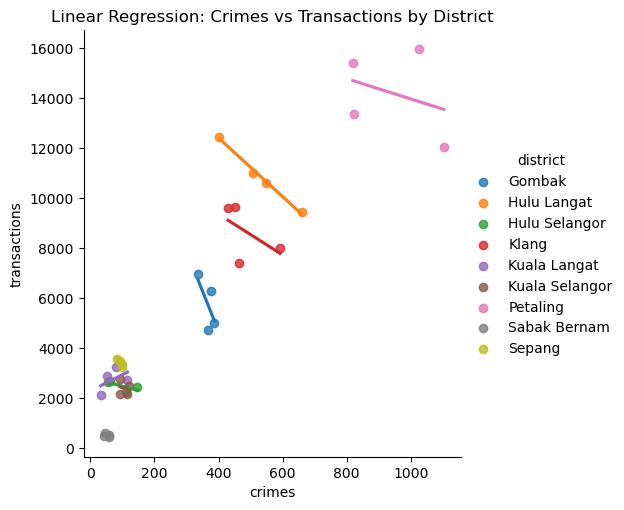

In [122]:
sns.lmplot(data=merged_df, x='crimes', y='transactions', hue='district', ci=None)
plt.title("Linear Regression: Crimes vs Transactions by District")
plt.show()


## corelation matrix

In [124]:
corr = merged_df[['transactions', 'crimes']].corr()

In [125]:
corr

,transactions,crimes
transactions,1.000000,0.921885
crimes,0.921885,1.000000


## Crime Rate Feature

In [127]:
merged_df['crime_rate'] = merged_df['crimes'] / merged_df['transactions']

In [128]:
merged_df[['district', 'year', 'crime_rate']].groupby(['district', 'year']).mean().unstack()

crime_rate                              
year                 2020      2021      2022      2023
district                                               
Gombak           0.077705  0.077261   0.04822   0.05986
Hulu Langat       0.06978  0.051744  0.032328  0.046139
Hulu Selangor    0.060494  0.050357   0.02122  0.022812
Klang            0.062466  0.073945  0.046627  0.044661
Kuala Langat      0.01567  0.024653  0.042444  0.017807
Kuala Selangor   0.042936  0.053456   0.03396  0.049047
Petaling          0.09149  0.061584  0.053065  0.064274
Sabak Bernam     0.140187   0.11284  0.086345  0.074797
Sepang           0.030433  0.022924  0.029193  0.026331

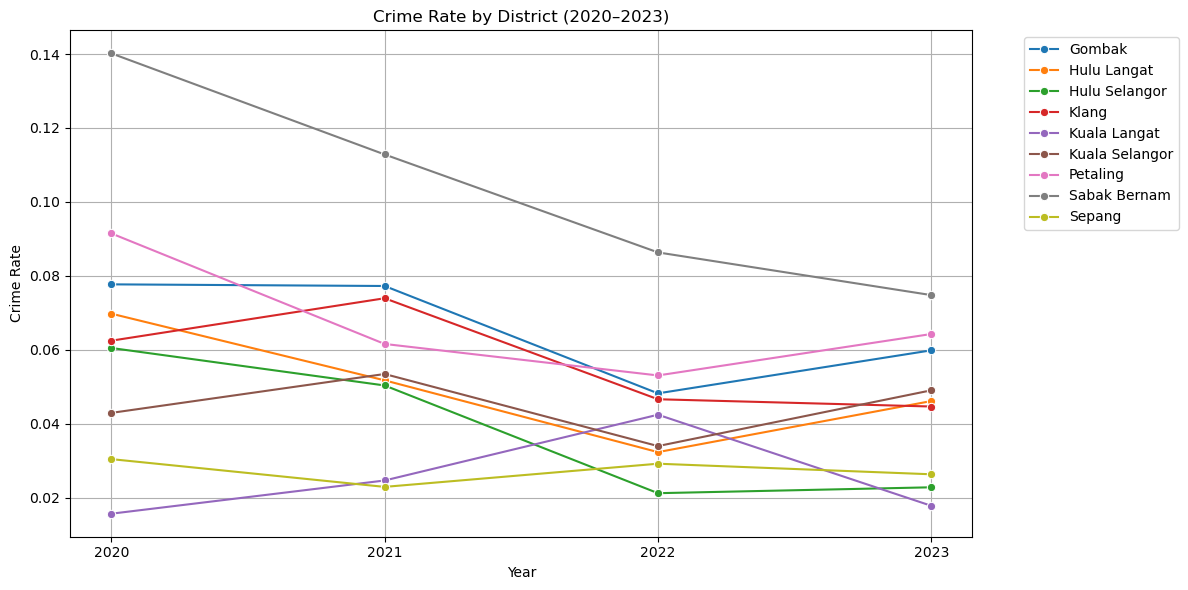

In [129]:
# Group and reshape the data
grouped = merged_df[['district', 'year', 'crime_rate']].groupby(['district', 'year']).mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='year', y='crime_rate', hue='district', marker='o', palette='tab10')
plt.title('Crime Rate by District (2020–2023)')
plt.ylabel('Crime Rate')
plt.xlabel('Year')
plt.xticks([2020, 2021, 2022, 2023])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## District Ranking (Mean Values)

In [131]:
avg_stats = merged_df.groupby('district')[['transactions', 'crimes', 'crime_rate']].mean().sort_values(by='crime_rate', ascending=False)

In [132]:
avg_stats

,transactions,crimes,crime_rate
district,,,
Sabak Bernam,513.75,51.75,0.103542
Petaling,14208.25,943.00,0.067603
Gombak,5749.5,366.75,0.065762
Klang,8678.25,484.00,0.056925
Hulu Langat,10888.0,530.00,0.049997
Kuala Selangor,2392.75,106.00,0.04485
Hulu Selangor,2496.75,94.25,0.038721
Sepang,3420.25,92.75,0.02722
Kuala Langat,2737.0,70.00,0.025144


## Year-over-Year Delta

In [134]:
merged_df.sort_values(['district', 'year'], inplace=True)
merged_df['transaction_change'] = merged_df.groupby('district')['transactions'].diff()
merged_df['crime_change'] = merged_df.groupby('district')['crimes'].diff()

In [135]:
merged_df.head(37)

,year,district,transactions,crimes,district_year,crime_rate,transaction_change,crime_change
20,2020,Gombak,4723,367,Gombak 2020,0.077705,NaN,NaN
21,2021,Gombak,5009,387,Gombak 2021,0.077261,286,20.0
22,2022,Gombak,6968,336,Gombak 2022,0.04822,1959,-51.0
23,2023,Gombak,6298,377,Gombak 2023,0.05986,-670,41.0
28,2020,Hulu Langat,9444,659,Hulu Langat 2020,0.06978,NaN,NaN
29,2021,Hulu Langat,10610,549,Hulu Langat 2021,0.051744,1166,-110.0
30,2022,Hulu Langat,12466,403,Hulu Langat 2022,0.032328,1856,-146.0
31,2023,Hulu Langat,11032,509,Hulu Langat 2023,0.046139,-1434,106.0
24,2020,Hulu Selangor,2430,147,Hulu Selangor 2020,0.060494,NaN,NaN
25,2021,Hulu Selangor,2244,113,Hulu Selangor 2021,0.050357,-186,-34.0


C:\Users\Acer\AppData\Local\Temp\ipykernel_14824\3735442942.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=delta_melted, x='year', y='Change Value', hue='Change Type', ci=None)


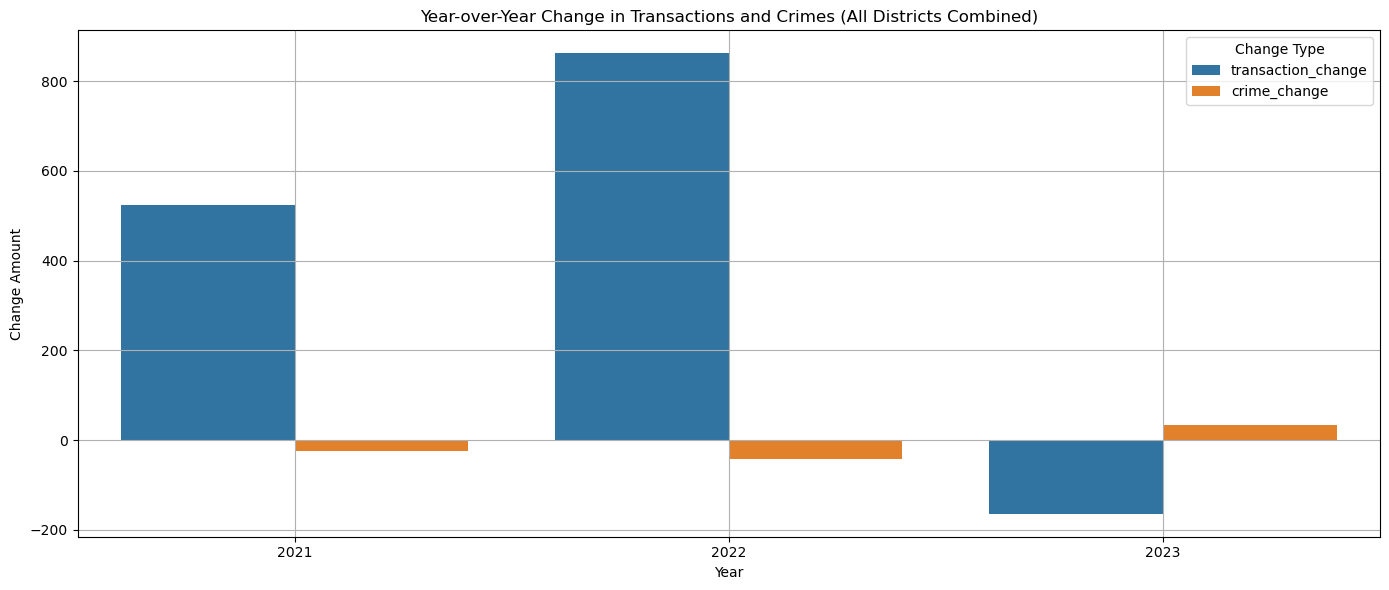

In [136]:
# Prepare data
delta_df = merged_df[['district', 'year', 'transaction_change', 'crime_change']].copy()
delta_df = delta_df.dropna()  # Drop rows with NaN (first year has no YoY change)

# Melt for grouped barplot
delta_melted = delta_df.melt(id_vars=['district', 'year'], 
                             value_vars=['transaction_change', 'crime_change'], 
                             var_name='Change Type', value_name='Change Value')

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=delta_melted, x='year', y='Change Value', hue='Change Type', ci=None)
plt.title('Year-over-Year Change in Transactions and Crimes (All Districts Combined)')
plt.xlabel('Year')
plt.ylabel('Change Amount')
plt.grid(True)
plt.legend(title='Change Type')
plt.tight_layout()
plt.show()


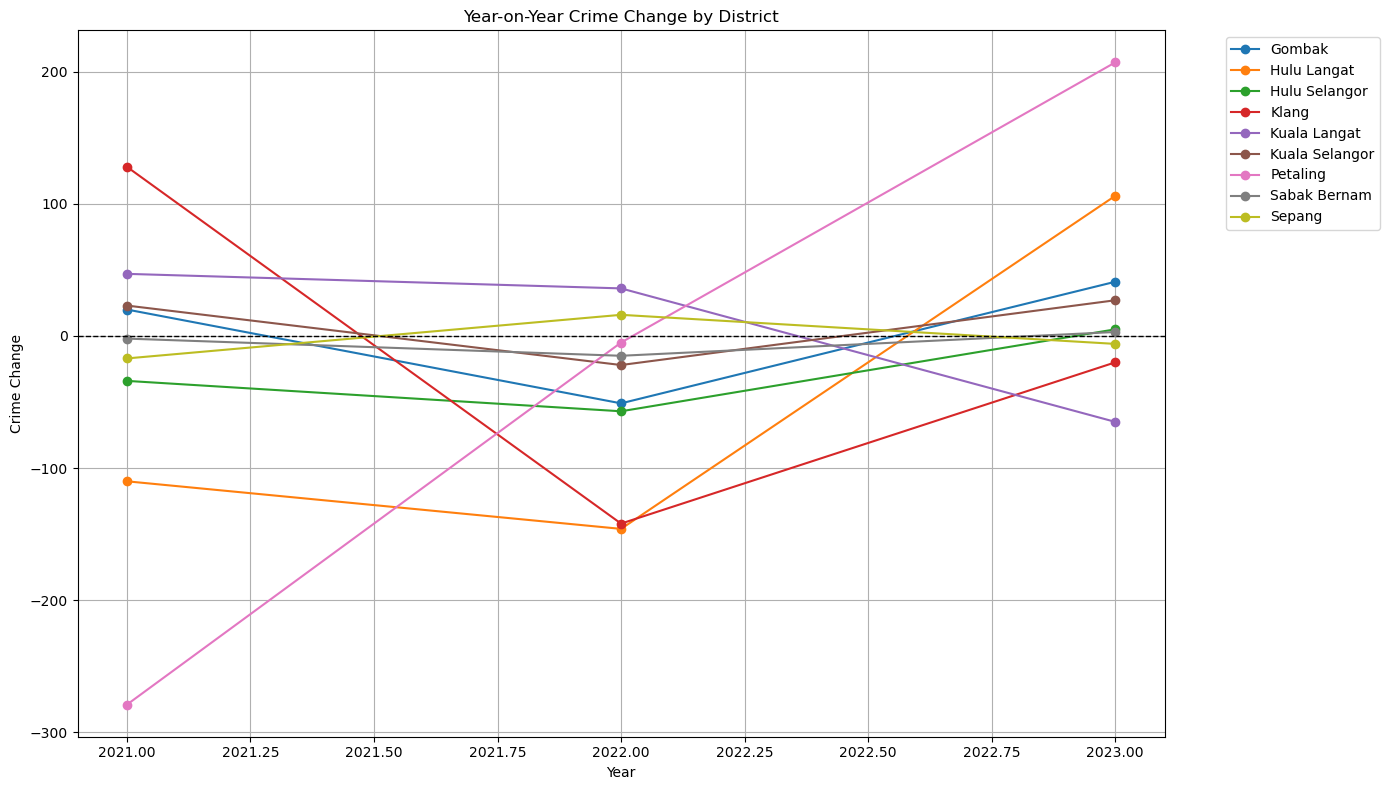

In [137]:
# Select one type of change to plot — e.g., crime_change
slope_df = merged_df[['district', 'year', 'crime_change']].dropna()

plt.figure(figsize=(14, 8))
for district in slope_df['district'].unique():
    district_data = slope_df[slope_df['district'] == district]
    plt.plot(district_data['year'], district_data['crime_change'], marker='o', label=district)

plt.title('Year-on-Year Crime Change by District')
plt.xlabel('Year')
plt.ylabel('Crime Change')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

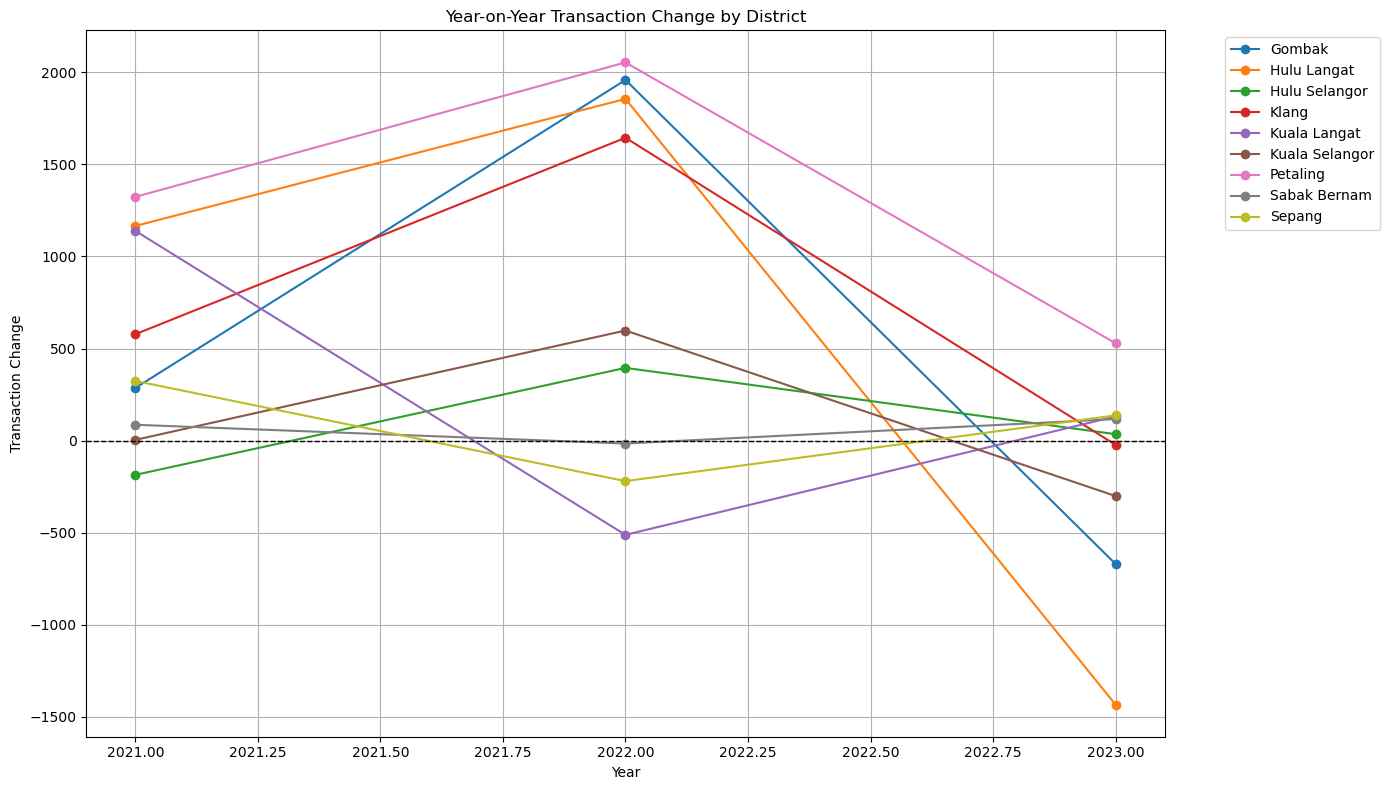

In [138]:
# Select one type of change to plot — e.g., crime_change
slope2_df = merged_df[['district', 'year', 'transaction_change']].dropna()

plt.figure(figsize=(14, 8))
for district in slope2_df['district'].unique():
    district_data = slope2_df[slope2_df['district'] == district]
    plt.plot(district_data['year'], district_data['transaction_change'], marker='o', label=district)

plt.title('Year-on-Year Transaction Change by District')
plt.xlabel('Year')
plt.ylabel('Transaction Change')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

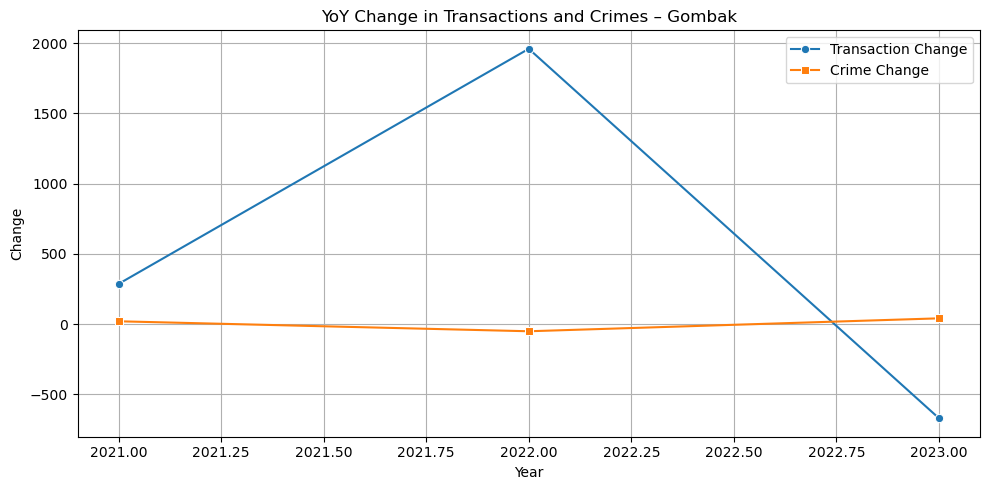

In [139]:
# Optional: pick a district
district_to_plot = 'Gombak'

# Filter
df_district = merged_df[merged_df['district'] == district_to_plot].dropna()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_district, x='year', y='transaction_change', label='Transaction Change', marker='o')
sns.lineplot(data=df_district, x='year', y='crime_change', label='Crime Change', marker='s')
plt.title(f'YoY Change in Transactions and Crimes – {district_to_plot}')
plt.xlabel('Year')
plt.ylabel('Change')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Scatter + Regression for Crime Rate vs Transactions

In [141]:
# Check column types - must be numeric
print(merged_df.dtypes[['crime_rate', 'transactions']])

crime_rate      object
transactions    object
dtype: object


In [143]:
# Convert to numeric (invalid parsing will be set as NaN)
merged_df['crime_rate'] = pd.to_numeric(merged_df['crime_rate'], errors='coerce')
merged_df['transactions'] = pd.to_numeric(merged_df['transactions'], errors='coerce')

In [145]:
# Drop rows with NaN (if any) caused by bad data
merged_df_clean = merged_df.dropna(subset=['crime_rate', 'transactions'])

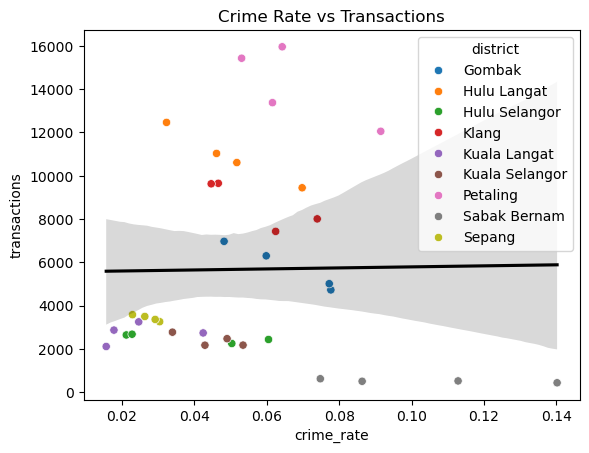

In [147]:
# Now plot again
sns.scatterplot(data=merged_df_clean, x='crime_rate', y='transactions', hue='district')
sns.regplot(data=merged_df_clean, x='crime_rate', y='transactions', scatter=False, color='black')
plt.title('Crime Rate vs Transactions')
plt.show()

## Visualize Year-over-Year Changes by District

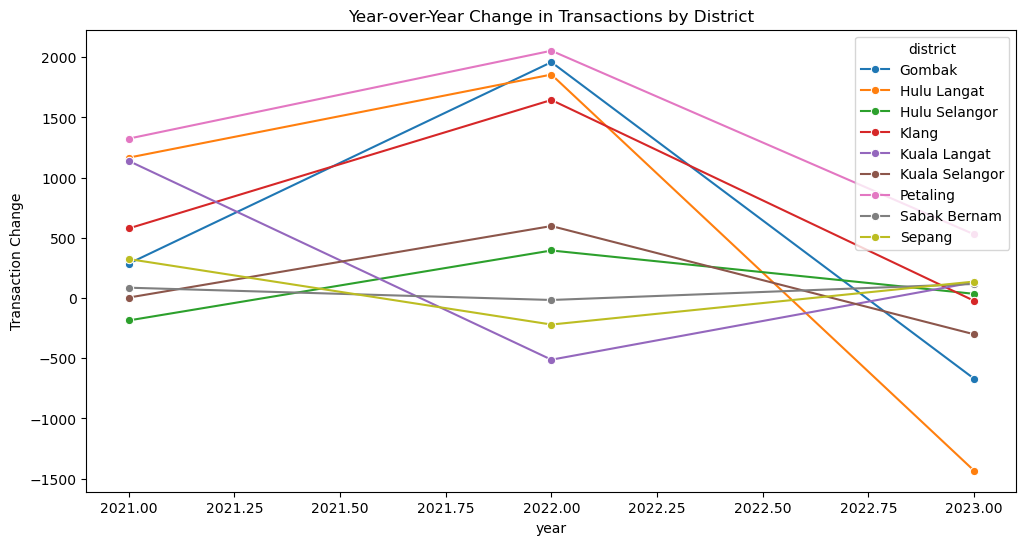

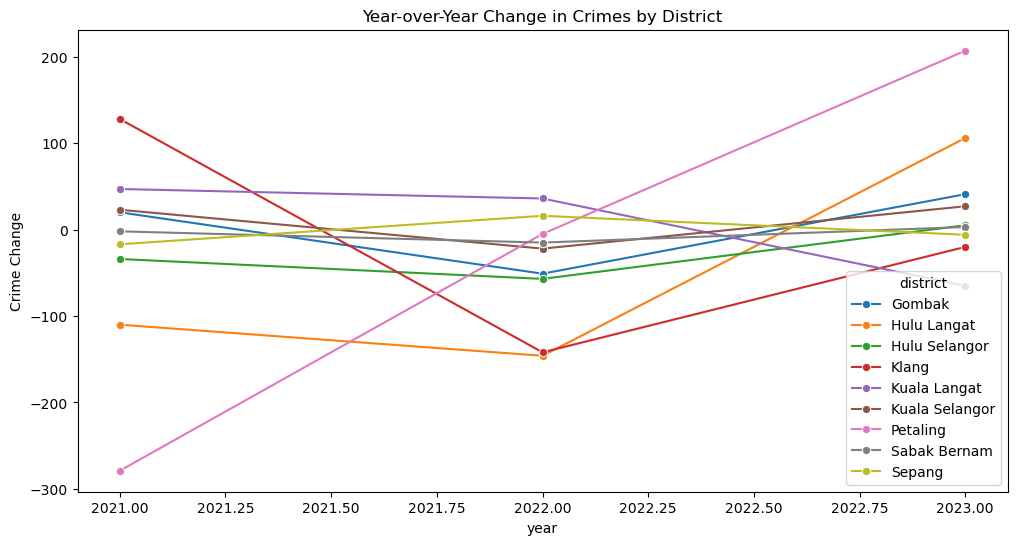

In [150]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='year', y='transaction_change', hue='district', marker='o')
plt.title('Year-over-Year Change in Transactions by District')
plt.ylabel('Transaction Change')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='year', y='crime_change', hue='district', marker='o')
plt.title('Year-over-Year Change in Crimes by District')
plt.ylabel('Crime Change')
plt.show()

## Correlation Between Yearly Changes

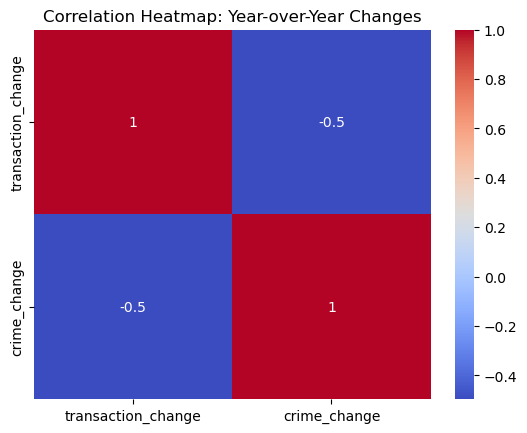

In [153]:
change_corr = merged_df[['transaction_change', 'crime_change']].corr()

sns.heatmap(change_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Year-over-Year Changes')
plt.show()

In [155]:
## merged_df.to_csv('merged_df3.csv', index=False)

### crime_to_transaction_ratio (feature engineering)

In [158]:
merged_df['crime_to_transaction_ratio'] = merged_df['crimes'] / merged_df['transactions']

In [160]:
merged_df.head(10)

,year,district,transactions,crimes,district_year,crime_rate,transaction_change,crime_change,crime_to_transaction_ratio
20,2020,Gombak,4723,367,Gombak 2020,0.077705,NaN,NaN,0.077705
21,2021,Gombak,5009,387,Gombak 2021,0.077261,286,20.0,0.077261
22,2022,Gombak,6968,336,Gombak 2022,0.048220,1959,-51.0,0.048220
23,2023,Gombak,6298,377,Gombak 2023,0.059860,-670,41.0,0.059860
28,2020,Hulu Langat,9444,659,Hulu Langat 2020,0.069780,NaN,NaN,0.069780
29,2021,Hulu Langat,10610,549,Hulu Langat 2021,0.051744,1166,-110.0,0.051744
30,2022,Hulu Langat,12466,403,Hulu Langat 2022,0.032328,1856,-146.0,0.032328
31,2023,Hulu Langat,11032,509,Hulu Langat 2023,0.046139,-1434,106.0,0.046139
24,2020,Hulu Selangor,2430,147,Hulu Selangor 2020,0.060494,NaN,NaN,0.060494
25,2021,Hulu Selangor,2244,113,Hulu Selangor 2021,0.050357,-186,-34.0,0.050357


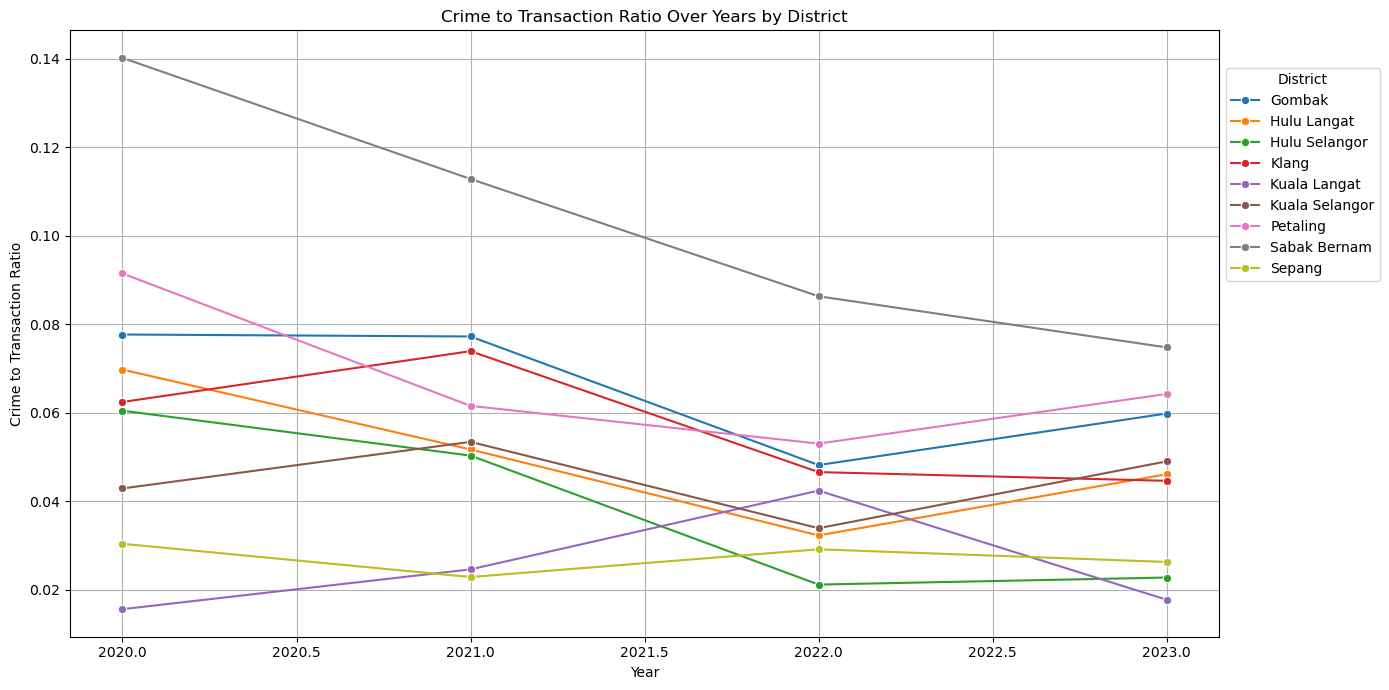

In [162]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=merged_df, x='year', y='crime_to_transaction_ratio', hue='district', marker='o')

plt.title('Crime to Transaction Ratio Over Years by District')
plt.xlabel('Year')
plt.ylabel('Crime to Transaction Ratio')
plt.grid(True)
plt.legend(title='District', bbox_to_anchor=(1, 0.95), loc='upper left')
plt.tight_layout()
plt.show()


### Volatality measure

In [164]:
# Calculate Year-over-Year changes
merged_df['transaction_change'] = merged_df.groupby('district')['transactions'].diff()
merged_df['crime_change'] = merged_df.groupby('district')['crimes'].diff()

# Measure volatility (standard deviation of YoY change)
volatility = merged_df.groupby('district')[['transaction_change', 'crime_change']].std().reset_index()
volatility.columns = ['district', 'transaction_volatility', 'crime_volatility']

# Standardize and apply K-Means
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(volatility[['transaction_volatility', 'crime_volatility']])

kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
volatility['cluster'] = kmeans.fit_predict(X_scaled)

# Merge for analysis
merged_df = merged_df.merge(volatility, on='district')

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [166]:
merged_df.head(37)

,year,district,transactions,crimes,district_year,crime_rate,transaction_change,crime_change,crime_to_transaction_ratio,transaction_volatility,crime_volatility,cluster
0,2020,Gombak,4723,367,Gombak 2020,0.077705,NaN,NaN,0.077705,1330.695683,48.211340,0
1,2021,Gombak,5009,387,Gombak 2021,0.077261,286.0,20.0,0.077261,1330.695683,48.211340,0
2,2022,Gombak,6968,336,Gombak 2022,0.048220,1959.0,-51.0,0.048220,1330.695683,48.211340,0
3,2023,Gombak,6298,377,Gombak 2023,0.059860,-670.0,41.0,0.059860,1330.695683,48.211340,0
4,2020,Hulu Langat,9444,659,Hulu Langat 2020,0.069780,NaN,NaN,0.069780,1734.944764,136.293800,0
5,2021,Hulu Langat,10610,549,Hulu Langat 2021,0.051744,1166.0,-110.0,0.051744,1734.944764,136.293800,0
6,2022,Hulu Langat,12466,403,Hulu Langat 2022,0.032328,1856.0,-146.0,0.032328,1734.944764,136.293800,0
7,2023,Hulu Langat,11032,509,Hulu Langat 2023,0.046139,-1434.0,106.0,0.046139,1734.944764,136.293800,0
8,2020,Hulu Selangor,2430,147,Hulu Selangor 2020,0.060494,NaN,NaN,0.060494,293.258134,31.342197,1
9,2021,Hulu Selangor,2244,113,Hulu Selangor 2021,0.050357,-186.0,-34.0,0.050357,293.258134,31.342197,1


In [169]:
merged_df.groupby('cluster')[['transaction_volatility', 'crime_volatility']].mean()

,transaction_volatility,crime_volatility
cluster,,
0,1101.069607,125.021030
1,274.103280,21.161404


In [171]:
# Group and display districts in each cluster per year
for year in [2020, 2021, 2022, 2023]:
    print(f"\n--- District Clusters for Year {year} ---")
    grouped_cluster = merged_df[merged_df['year'] == year].groupby('cluster')['district'].unique()
    for cluster, districts in grouped_cluster.items():
        district_list = sorted(set(map(str, districts)))  # Remove duplicates, ensure strings
        print(f"Cluster {cluster}: {', '.join(district_list)}")


--- District Clusters for Year 2020 ---
Cluster 0: Gombak, Hulu Langat, Klang, Kuala Langat, Petaling
Cluster 1: Hulu Selangor, Kuala Selangor, Sabak Bernam, Sepang

--- District Clusters for Year 2021 ---
Cluster 0: Gombak, Hulu Langat, Klang, Kuala Langat, Petaling
Cluster 1: Hulu Selangor, Kuala Selangor, Sabak Bernam, Sepang

--- District Clusters for Year 2022 ---
Cluster 0: Gombak, Hulu Langat, Klang, Kuala Langat, Petaling
Cluster 1: Hulu Selangor, Kuala Selangor, Sabak Bernam, Sepang

--- District Clusters for Year 2023 ---
Cluster 0: Gombak, Hulu Langat, Klang, Kuala Langat, Petaling
Cluster 1: Hulu Selangor, Kuala Selangor, Sabak Bernam, Sepang


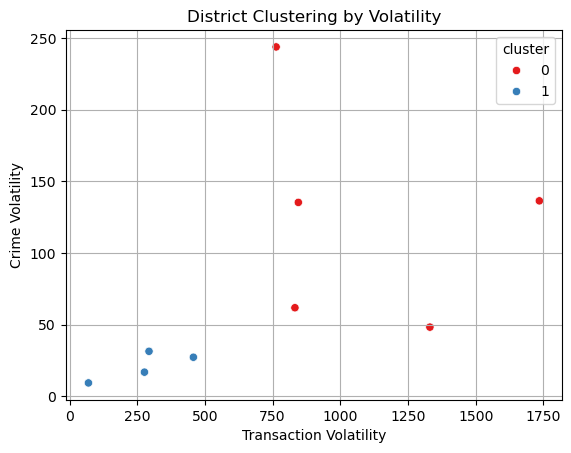

In [173]:
sns.scatterplot(
    data=merged_df.drop_duplicates('district'),
    x='transaction_volatility',
    y='crime_volatility',
    hue='cluster',
    palette='Set1'
)
plt.title('District Clustering by Volatility')
plt.xlabel('Transaction Volatility')
plt.ylabel('Crime Volatility')
plt.grid(True)
plt.show()

## Geopandas integration

In [175]:
import geopandas as gpd

# Load Selangor district boundaries shapefile
geo_df = gpd.read_file('map.geojson')  # or .shp

In [177]:
# check data
gdf = gpd.read_file("map.geojson")
print(gdf.head())

   Selangor       District                                           geometry
0  Selangor         Gombak  POLYGON ((101.45938 3.39981, 101.45902 3.40044...
1  Selangor    Hulu Langat  POLYGON ((101.86078 3.27194, 101.86059 3.27206...
2  Selangor  Hulu Selangor  POLYGON ((101.36578 3.80173, 101.36532 3.80215...
3  Selangor          Klang  MULTIPOLYGON (((101.41259 3.19198, 101.4083 3....
4  Selangor   Kuala Langat  POLYGON ((101.58104 2.96948, 101.5757 2.97978,...


In [179]:
# Merge your data with the geo data
map_df = geo_df.merge(merged_df[merged_df['year'] == 2023], on='district', how='left')

KeyError: 'district'

NameError: name 'map_df' is not defined

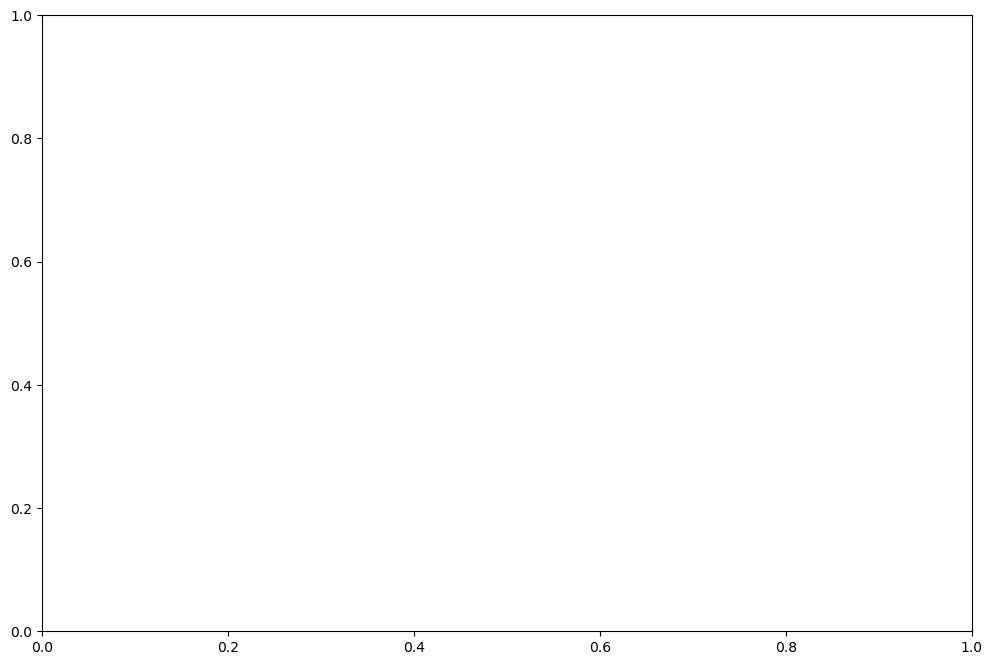

In [181]:
# Plot clusters on a map
fig, ax = plt.subplots(figsize=(12, 8))
map_df.plot(column='cluster', cmap='Set1', linewidth=0.8, edgecolor='black', legend=True, ax=ax)
plt.title("District Clusters in Selangor (2023)")
plt.axis('off')
plt.show()

In [183]:
# check columns
print(gdf.columns)

Index(['Selangor', 'District', 'geometry'], dtype='object')


In [185]:
gdf.rename(columns={'District': 'district'}, inplace=True)
# lower case to match the existing data column's name for easy merging later
# GeoDataFrame (gdf) doesnt hv a column named 'district', which is needed to join/merge your crime and transaction data with the map for visualization
# standardize spelling or casing is needed to merge data

In [187]:
# recheck columns
#'Selangor' is likely meant to be the state name, but it has been mistakenly set as a column name
print(gdf.columns)

Index(['Selangor', 'district', 'geometry'], dtype='object')


In [189]:
print(gdf.columns.tolist())

['Selangor', 'district', 'geometry']


In [191]:
gdf.rename(columns={'Selangor': 'state'}, inplace=True)
# system may think Selangor as a column header, thats why need to rename Selangor to state, so the the system can read the data

In [193]:
print(gdf.columns.tolist())

['state', 'district', 'geometry']


In [195]:
map_df = gdf.merge(merged_df[merged_df['year'] == 2023], on='district', how='left')

In [197]:
print(map_df.head())

      state       district                                           geometry  \
0  Selangor         Gombak  POLYGON ((101.45938 3.39981, 101.45902 3.40044...   
1  Selangor    Hulu Langat  POLYGON ((101.86078 3.27194, 101.86059 3.27206...   
2  Selangor  Hulu Selangor  POLYGON ((101.36578 3.80173, 101.36532 3.80215...   
3  Selangor          Klang  MULTIPOLYGON (((101.41259 3.19198, 101.4083 3....   
4  Selangor   Kuala Langat  POLYGON ((101.58104 2.96948, 101.5757 2.97978,...   

   year  transactions  crimes       district_year  crime_rate  \
0  2023          6298     377         Gombak 2023    0.059860   
1  2023         11032     509    Hulu Langat 2023    0.046139   
2  2023          2674      61  Hulu Selangor 2023    0.022812   
3  2023          9628     430          Klang 2023    0.044661   
4  2023          2864      51   Kuala Langat 2023    0.017807   

   transaction_change  crime_change  crime_to_transaction_ratio  \
0              -670.0          41.0                    

### Transactions by District (2023)

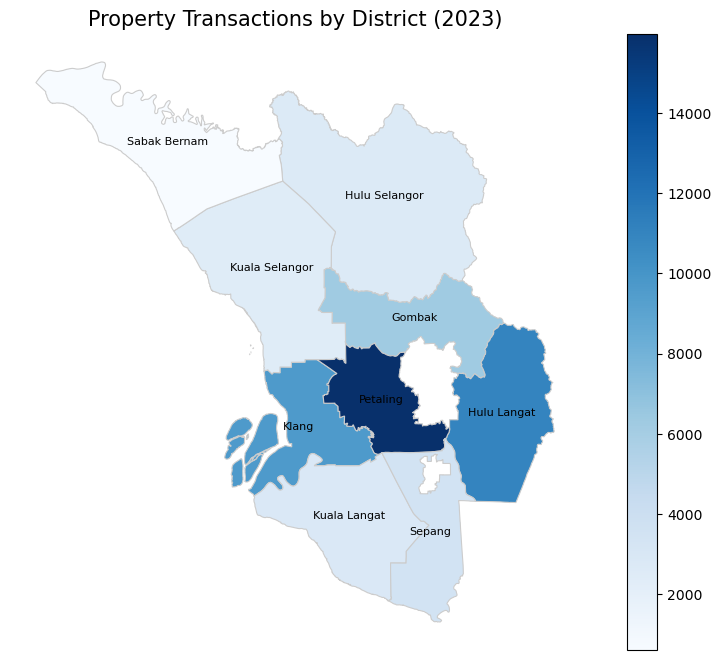

In [200]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
map_df.plot(column='transactions', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Property Transactions by District (2023)', fontsize=15)
ax.axis('off')

# Optional: Add district labels
for idx, row in map_df.iterrows():
    ax.annotate(row['district'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

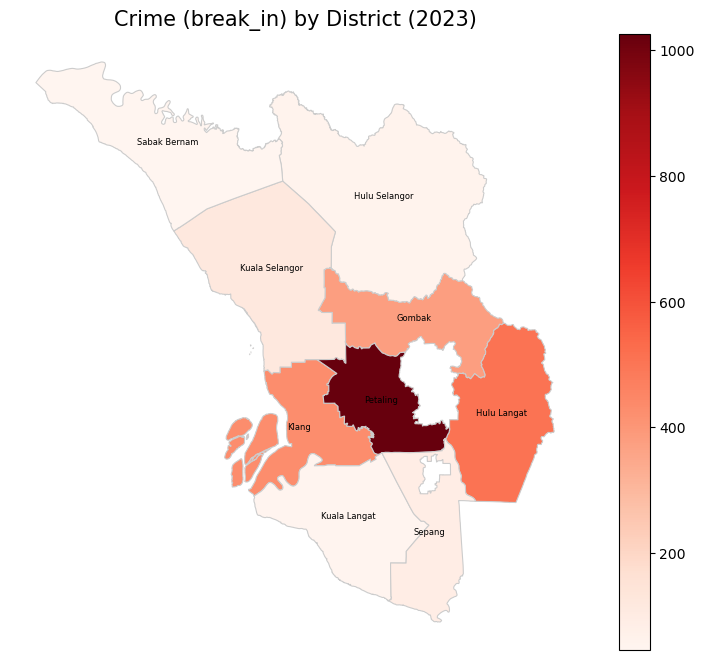

In [206]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
map_df.plot(column='crimes', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Crime (break_in) by District (2023)', fontsize=15)
ax.axis('off')

# Optional: Add district labels
for idx, row in map_df.iterrows():
    ax.annotate(row['district'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=6, color='black')

### Crime Rate by District (2023)

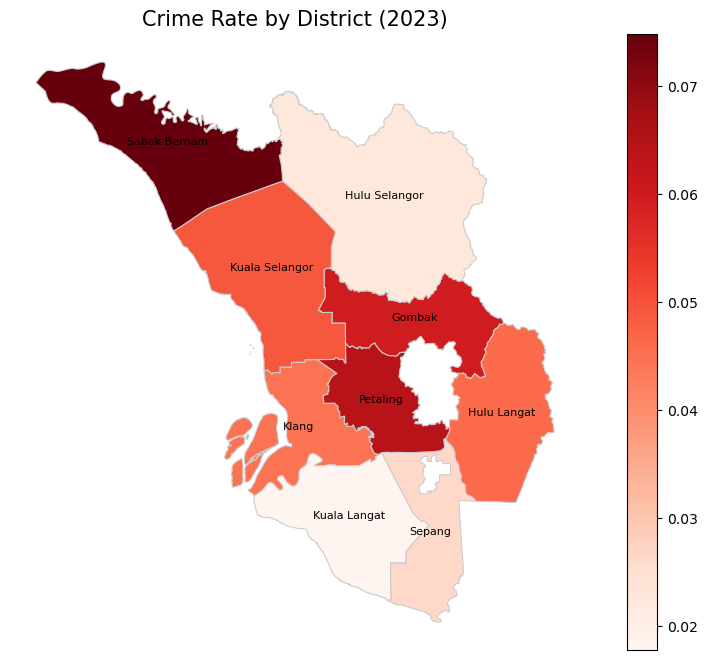

In [209]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
map_df.plot(column='crime_rate', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Crime Rate by District (2023)', fontsize=15)
ax.axis('off')

# Optional: District labels
for idx, row in map_df.iterrows():
    ax.annotate(row['district'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')


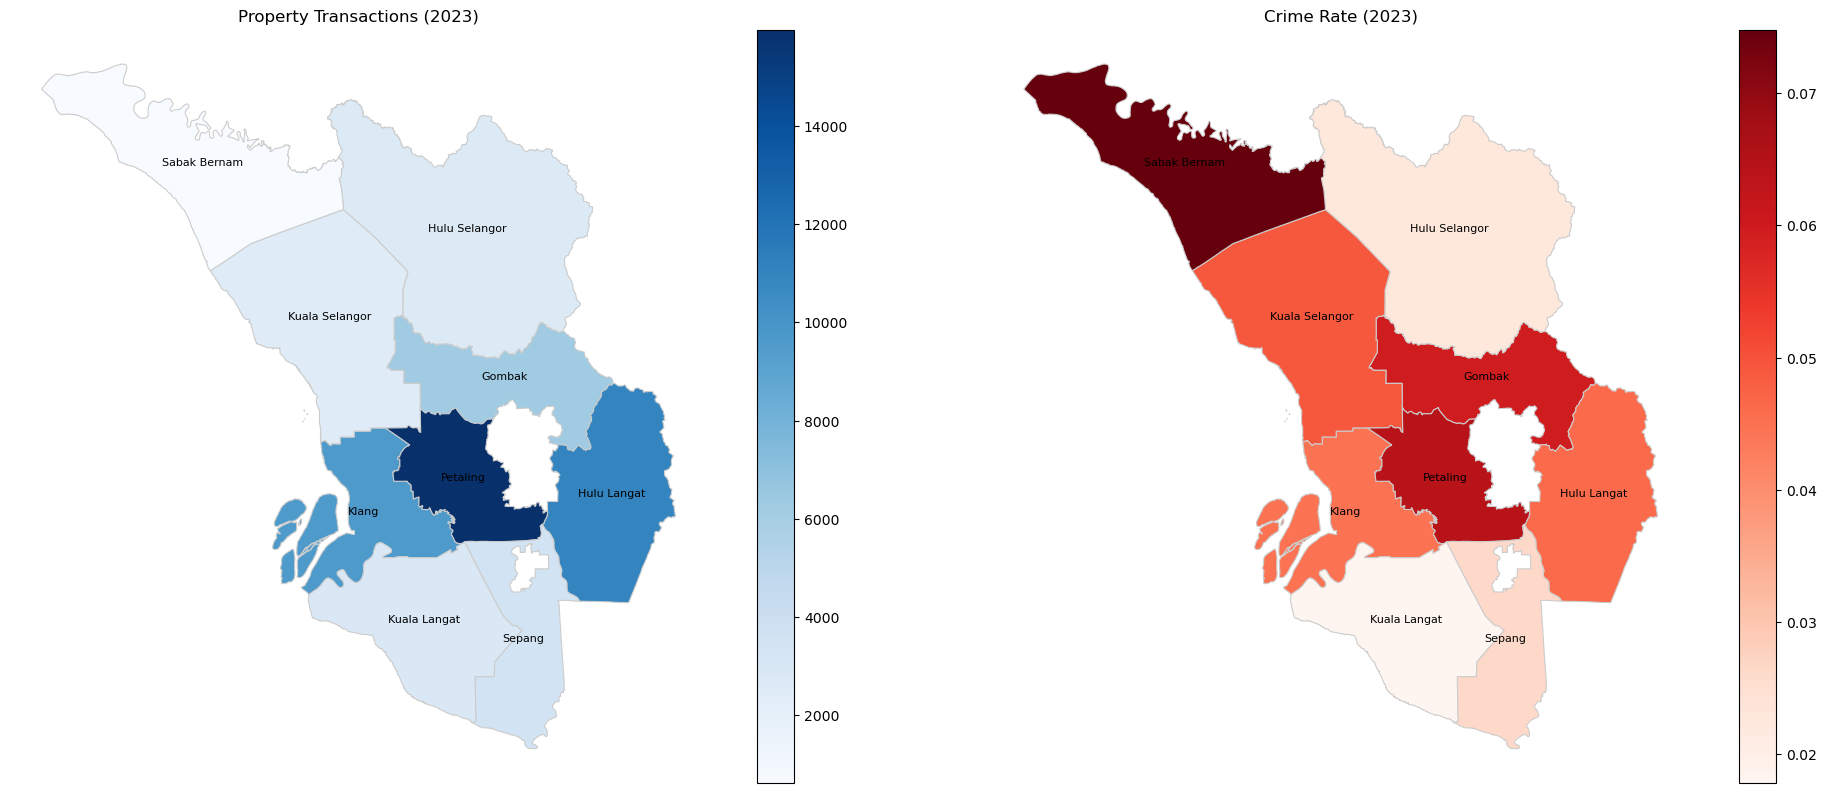

In [211]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8)) # Creates 1 row, 2 columns of subplots

# --- Left Map: Property Transactions ---
map_df.plot(column='transactions', cmap='Blues', linewidth=0.8, ax=axes[0], edgecolor='0.8', legend=True)
axes[0].set_title('Property Transactions (2023)')
axes[0].axis('off')

# Add district labels to the LEFT map (axes[0])
for idx, row in map_df.iterrows():
    # Make sure 'district' is the correct column name in your map_df
    # containing the district names for labeling.
    axes[0].annotate(row['district'], # The text to display
                     xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), # The point to annotate
                     horizontalalignment='center', fontsize=8, color='black')


# --- Right Map: Crime Rate ---
map_df.plot(column='crime_rate', cmap='Reds', linewidth=0.8, ax=axes[1], edgecolor='0.8', legend=True)
axes[1].set_title('Crime Rate (2023)')
axes[1].axis('off')

# Add district labels to the RIGHT map (axes[1])
for idx, row in map_df.iterrows():
    # Again, ensure 'district' is the correct column name
    axes[1].annotate(row['district'], # The text to display
                     xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), # The point to annotate
                     horizontalalignment='center', fontsize=8, color='black')

plt.tight_layout() # Adjusts subplot params for a tight layout.
plt.show()

In [213]:
avg_stats = merged_df.groupby('district')[['transactions', 'crimes', 'crime_rate']].mean().sort_values(by='crime_rate', ascending=False).reset_index()

In [215]:
ranked_gdf = gdf.merge(avg_stats, on='district', how='left')

In [217]:
import folium
from folium.features import GeoJsonTooltip

# Initialize base map
m = folium.Map(location=[3.1, 101.5], zoom_start=9)

# Add crime rate choropleth (avg across years)
folium.Choropleth(
    geo_data=ranked_gdf,
    data=ranked_gdf,
    columns=['district', 'crime_rate'],
    key_on='feature.properties.district',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.3,
    nan_fill_color='gray',
    legend_name='Average Crime Rate (2020–2023)'
).add_to(m)

# Add labels and tooltips
tooltip = GeoJsonTooltip(
    fields=['district', 'transactions', 'crimes', 'crime_rate'],
    aliases=['District:', 'Avg Transactions:', 'Avg Crimes:', 'Avg Crime Rate:'],
    localize=True,
    sticky=True
)
folium.GeoJson(
    ranked_gdf,
    name="Districts",
    tooltip=tooltip
).add_to(m)

folium.LayerControl().add_to(m)

# Add district name labels
for idx, row in map_df.iterrows():
    if row['geometry'].geom_type == 'Polygon':
        centroid = row['geometry'].centroid
    else:
        centroid = row['geometry'].centroid

    folium.map.Marker(
        [centroid.y, centroid.x],
        icon=DivIcon(
            icon_size=(150, 36),
            icon_anchor=(0, 0),
            html=f'<div style="font-size: 8pt; color: black;">{row["district"]}</div>',
        )
    ).add_to(m)

# Save map
#m.save("district_ranking_map.html")

# Display map
m

NameError: name 'DivIcon' is not defined

In [ ]:
merged_df['crime_rate_mean'] = merged_df.groupby('district')[['crime_rate']].mean()

In [220]:
# 1. Ensure 'crime_rate_mean' is correctly calculated in merged_df
merged_df['crime_rate_mean'] = merged_df.groupby('district')[['crime_rate']].transform('mean')

In [222]:
merged_df.head()

,year,district,transactions,crimes,district_year,crime_rate,transaction_change,crime_change,crime_to_transaction_ratio,transaction_volatility,crime_volatility,cluster,crime_rate_mean
0,2020,Gombak,4723,367,Gombak 2020,0.077705,NaN,NaN,0.077705,1330.695683,48.21134,0,0.065762
1,2021,Gombak,5009,387,Gombak 2021,0.077261,286.0,20.0,0.077261,1330.695683,48.21134,0,0.065762
2,2022,Gombak,6968,336,Gombak 2022,0.048220,1959.0,-51.0,0.048220,1330.695683,48.21134,0,0.065762
3,2023,Gombak,6298,377,Gombak 2023,0.059860,-670.0,41.0,0.059860,1330.695683,48.21134,0,0.065762
4,2020,Hulu Langat,9444,659,Hulu Langat 2020,0.069780,NaN,NaN,0.069780,1734.944764,136.29380,0,0.049997


In [224]:
# 2. Get unique district means (as before)
district_means = merged_df.drop_duplicates(subset=['district'])[['district', 'crime_rate_mean']]

In [226]:
# 3. Merge the existing map_df with the unique district means
map_df = map_df.merge(district_means, on='district', how='left')

# Your map_df is now updated.
print(map_df.head())

      state       district                                           geometry  \
0  Selangor         Gombak  POLYGON ((101.45938 3.39981, 101.45902 3.40044...   
1  Selangor    Hulu Langat  POLYGON ((101.86078 3.27194, 101.86059 3.27206...   
2  Selangor  Hulu Selangor  POLYGON ((101.36578 3.80173, 101.36532 3.80215...   
3  Selangor          Klang  MULTIPOLYGON (((101.41259 3.19198, 101.4083 3....   
4  Selangor   Kuala Langat  POLYGON ((101.58104 2.96948, 101.5757 2.97978,...   

   year  transactions  crimes       district_year  crime_rate  \
0  2023          6298     377         Gombak 2023    0.059860   
1  2023         11032     509    Hulu Langat 2023    0.046139   
2  2023          2674      61  Hulu Selangor 2023    0.022812   
3  2023          9628     430          Klang 2023    0.044661   
4  2023          2864      51   Kuala Langat 2023    0.017807   

   transaction_change  crime_change  crime_to_transaction_ratio  \
0              -670.0          41.0                    

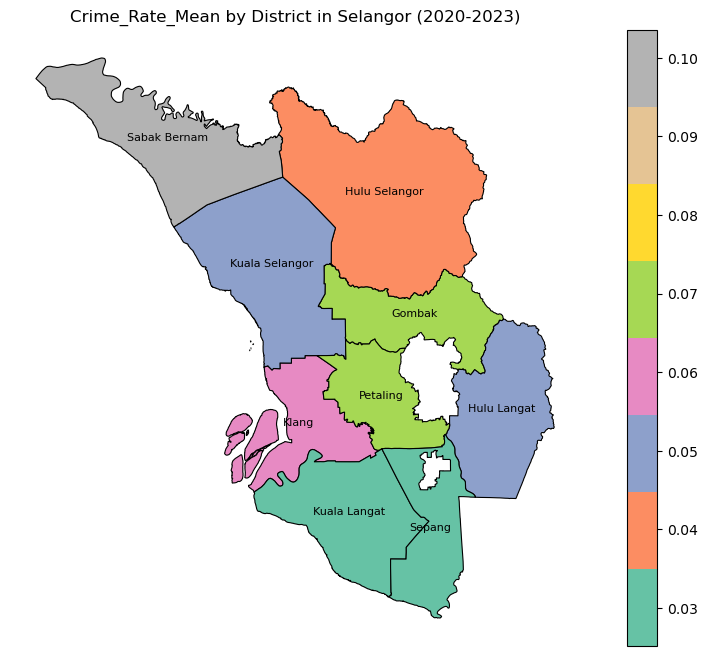

In [228]:
# Plot clusters on a map
fig, ax = plt.subplots(figsize=(12, 8))
map_df.plot(column='crime_rate_mean', cmap='Set2', linewidth=0.8, edgecolor='black', legend=True, ax=ax)
plt.title("Crime_Rate_Mean by District in Selangor (2020-2023)")
plt.axis('off')

# Optional: District labels
for idx, row in map_df.iterrows():
    ax.annotate(row['district'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

plt.show()

In [230]:
from scipy.stats import linregress

# --- 1. Calculate the slope for each district ---
# We'll store the slopes in a dictionary
district_slopes = {}

for district_name in merged_df['district'].unique():
    district_data = merged_df[merged_df['district'] == district_name]
    # Ensure there's enough data points for a meaningful regression (at least 2)
    if len(district_data) >= 2:
        # Perform linear regression: y = transactions, x = crimes
        slope, intercept, r_value, p_value, std_err = linregress(
            x=district_data['crimes'],
            y=district_data['transactions']
        )
        district_slopes[district_name] = slope
    else:
        district_slopes[district_name] = None # Or np.nan, or 0, depending on how you want to handle it

# Convert the dictionary to a DataFrame
slopes_df = pd.DataFrame.from_dict(district_slopes, orient='index', columns=['crime_transactions_slope'])
slopes_df.index.name = 'district'
slopes_df = slopes_df.reset_index()

In [232]:
# --- 2. Merge these slopes into your map_df ---
# Ensure map_df is your GeoDataFrame
# Assuming map_df already has district geometries and a 'district' column

# You should already have map_df from your previous steps where you merged gdf with merged_df.
# If not, ensure gdf is loaded first, then merge.
# Example:
# gdf = gpd.read_file("path/to/your/district_boundaries.geojson")
# map_df = gdf.merge(merged_df.drop_duplicates(subset=['district'])[['district']], on='district', how='left') # initial merge if not done

map_df = map_df.merge(slopes_df, on='district', how='left')

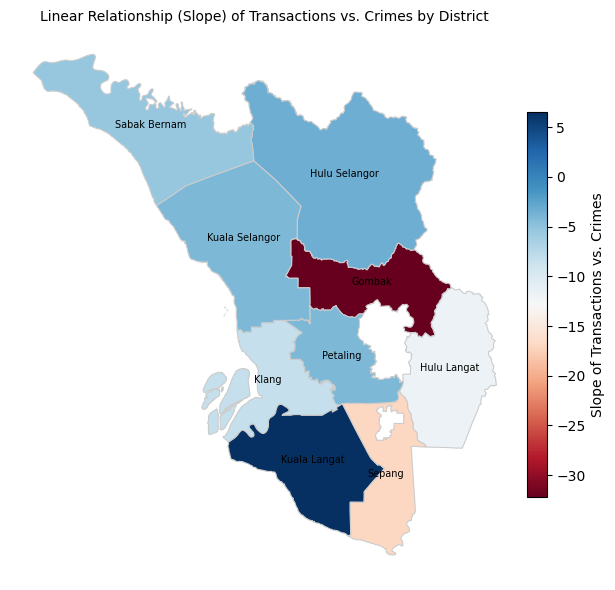

In [234]:
# --- 3. Plot the choropleth map ---
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the map
# Using a diverging colormap ('RdBu') is good for slopes (positive/negative/zero)
map_df.plot(column='crime_transactions_slope',
            cmap='RdBu', # Red-Blue diverging colormap (Red for negative, Blue for positive)
            linewidth=0.8,
            ax=ax,
            edgecolor='0.8',
            legend=True,
            legend_kwds={'label': "Slope of Transactions vs. Crimes",
                         'orientation': "vertical", # Changed to vertical
                         'shrink': 0.7,
                         'pad': 0.01},
            vmin=map_df['crime_transactions_slope'].min(), # Ensure consistent color scale
            vmax=map_df['crime_transactions_slope'].max()  # Ensure consistent color scale
            )

# Add title
ax.set_title('Linear Relationship (Slope) of Transactions vs. Crimes by District',
             fontsize=10)

# Remove axis
ax.set_axis_off()

# Optional: Add district labels (can make the map very cluttered if too many districts)
for idx, row in map_df.iterrows():
    ax.annotate(text=row['district'], xy=row.geometry.centroid.coords[0],
            horizontalalignment='center', fontsize=7, color='black')

plt.tight_layout()
plt.show()

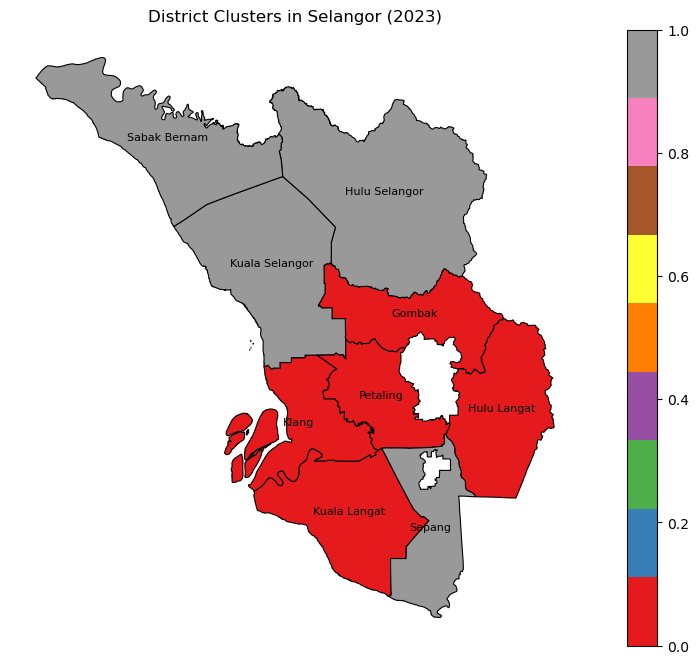

In [236]:
# Plot clusters on a map
fig, ax = plt.subplots(figsize=(12, 8))
map_df.plot(column='cluster', cmap='Set1', linewidth=0.8, edgecolor='black', legend=True, ax=ax)
plt.title("District Clusters in Selangor (2023)")
plt.axis('off')

# Optional: District labels
for idx, row in map_df.iterrows():
    ax.annotate(row['district'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

plt.show()

In [238]:
## pip install geopandas contextily

In [240]:
## pip install folium

In [242]:
geojson_data = map_df.to_json()

In [244]:
import folium
from folium.features import GeoJsonTooltip

# Base map centered around Selangor
m = folium.Map(location=[3.1, 101.5], zoom_start=9)

# Add choropleth
choropleth = folium.Choropleth(
    geo_data=geojson_data,
    data=map_df,
    columns=['district', 'crime_rate'],
    key_on='feature.properties.district',
    fill_color='Reds',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Rate (2023)'
).add_to(m)

# Add tooltip
tooltip = GeoJsonTooltip(
    fields=['district', 'transactions', 'crimes', 'crime_rate'],
    aliases=['District:', 'Transactions:', 'Crimes:', 'Crime Rate:'],
    localize=True,
    sticky=True
)
choropleth.geojson.add_child(tooltip)

# Display map
m

In [246]:
# pip install branca

In [248]:
import folium
from folium.features import GeoJsonTooltip
import geopandas as gpd
import pandas as pd
from ipywidgets import interact
from IPython.display import display

# Function to update the map based on selected year
def plot_choropleth(selected_year):
    # Filter your data for the selected year
    year_data = merged_df[merged_df['year'] == selected_year]

    # Merge with geojson GeoDataFrame
    map_df = gdf.merge(year_data, on='district', how='left')

    # Base map centered around Selangor
    m = folium.Map(location=[3.1, 101.5], zoom_start=9)

    # Choropleth
    choropleth = folium.Choropleth(
        geo_data=map_df,
        data=map_df,
        columns=['district', 'crime_rate'],
        key_on='feature.properties.district',
        fill_color='Reds',
        fill_opacity=0.7,
        line_opacity=0.2,
        nan_fill_color='gray',
        legend_name=f'Crime Rate ({selected_year})'
    ).add_to(m)

    # Add tooltip
    tooltip = GeoJsonTooltip(
        fields=['district', 'transactions', 'crimes', 'crime_rate'],
        aliases=['District:', 'Transactions:', 'Crimes:', 'Crime Rate:'],
        localize=True,
        sticky=True
    )
    choropleth.geojson.add_child(tooltip)

    display(m)

# Create dropdown to toggle year
interact(plot_choropleth, selected_year=sorted(merged_df['year'].unique()))


interactive(children=(Dropdown(description='selected_year', options=(2020, 2021, 2022, 2023), value=2020), Out…

<function __main__.plot_choropleth(selected_year)>

In [250]:
# Function to update the map based on selected year
def plot_crime_to_transaction_map(selected_year):
    # Filter for selected year
    year_data = merged_df[merged_df['year'] == selected_year]

    # Merge with GeoDataFrame
    map_df = gdf.merge(year_data, on='district', how='left')

    # Initialize base map
    m = folium.Map(location=[3.1, 101.5], zoom_start=9)

    # Choropleth map with crime-to-transaction ratio
    choropleth = folium.Choropleth(
        geo_data=map_df,
        data=map_df,
        columns=['district', 'crime_to_transaction_ratio'],
        key_on='feature.properties.district',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        nan_fill_color='gray',
        legend_name=f'Crime-to-Transaction Ratio ({selected_year})'
    ).add_to(m)

    # Add interactive tooltip
    tooltip = GeoJsonTooltip(
        fields=['district', 'transactions', 'crimes', 'crime_to_transaction_ratio'],
        aliases=['District:', 'Transactions:', 'Crimes:', 'Crime/Transaction Ratio:'],
        localize=True,
        sticky=True
    )
    choropleth.geojson.add_child(tooltip)

    display(m)

# Create dropdown for year selection
interact(plot_crime_to_transaction_map, selected_year=sorted(merged_df['year'].unique()))


interactive(children=(Dropdown(description='selected_year', options=(2020, 2021, 2022, 2023), value=2020), Out…

<function __main__.plot_crime_to_transaction_map(selected_year)>

In [252]:
from folium import Choropleth, LayerControl, Map
from ipywidgets import interact

# Sample structure placeholder since actual data is not in this environment
# These would typically be loaded or passed into the script
# merged_df = pd.read_csv("your_processed_data.csv")
# gdf = gpd.read_file("your_districts.geojson")

# For now, we will simulate a simplified structure
# Assuming merged_df and gdf are already defined in the user environment

# Define function to create multi-layer interactive map
def plot_multi_layer_map(selected_year):
    # Filter data for the selected year
    year_data = merged_df[merged_df['year'] == selected_year]
    map_df = gdf.merge(year_data, on='district', how='left')

    # Create base map
    m = Map(location=[3.1, 101.5], zoom_start=9)

    # Define multiple layers
    layers = {
        'Crime Rate': 'crime_rate',
        'Crime-to-Transaction Ratio': 'crime_to_transaction_ratio',
        'Transactions': 'transactions',
        'Crimes': 'crimes',
        'Cluster': 'cluster'
    }

    for name, column in layers.items():
        Choropleth(
            geo_data=map_df,
            data=map_df,
            columns=['district', column],
            key_on='feature.properties.district',
            fill_color='YlOrRd' if name != 'Cluster' else 'Set1',
            fill_opacity=0.6,
            line_opacity=0.3,
            nan_fill_color='gray',
            name=f'{name} ({selected_year})',
            legend_name=f'{name} ({selected_year})'
        ).add_to(m)

    # Tooltip for all layers
    tooltip = GeoJsonTooltip(
        fields=['district', 'transactions', 'crimes', 'crime_rate', 'crime_to_transaction_ratio', 'cluster'],
        aliases=['District:', 'Transactions:', 'Crimes:', 'Crime Rate:', 'Crime/Transaction Ratio:', 'Cluster:'],
        localize=True,
        sticky=True
    )
    folium.GeoJson(
        map_df,
        name="Districts",
        tooltip=tooltip
    ).add_to(m)

    # Add layer control
    LayerControl().add_to(m)
    display(m)

# Interactive widget
interact(plot_multi_layer_map, selected_year=sorted(merged_df['year'].unique()));

# Optional: District labels
for idx, row in map_df.iterrows():
    ax.annotate(row['district'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')


interactive(children=(Dropdown(description='selected_year', options=(2020, 2021, 2022, 2023), value=2020), Out…

In [253]:
from folium.features import GeoJsonTooltip, DivIcon
from shapely.geometry import Point

def plot_multi_layer_map(selected_year):
    # Filter for the selected year
    year_data = merged_df[merged_df['year'] == selected_year]
    map_df = gdf.merge(year_data, on='district', how='left')

    # Create base map
    m = Map(location=[3.1, 101.5], zoom_start=9)

    # Define layers to toggle
    layers = {
        'Crime Rate': 'crime_rate',
        'Crime-to-Transaction Ratio': 'crime_to_transaction_ratio',
        'Transactions': 'transactions',
        'Crimes': 'crimes',
        'Cluster': 'cluster'
    }

    # Add choropleth layers
    for name, column in layers.items():
        Choropleth(
            geo_data=map_df,
            data=map_df,
            columns=['district', column],
            key_on='feature.properties.district',
            fill_color='YlOrRd' if name != 'Cluster' else 'Set1',
            fill_opacity=0.6,
            line_opacity=0.3,
            nan_fill_color='gray',
            name=f'{name} ({selected_year})',
            legend_name=f'{name} ({selected_year})'
        ).add_to(m)

    # Add tooltip for district info
    tooltip = GeoJsonTooltip(
        fields=['district', 'transactions', 'crimes', 'crime_rate', 'crime_to_transaction_ratio', 'cluster'],
        aliases=['District:', 'Transactions:', 'Crimes:', 'Crime Rate:', 'Crime/Transaction Ratio:', 'Cluster:'],
        localize=True,
        sticky=True
    )
    folium.GeoJson(
        map_df,
        name="Districts",
        tooltip=tooltip
    ).add_to(m)

    # Add district name labels
    for idx, row in map_df.iterrows():
        if row['geometry'].geom_type == 'Polygon':
            centroid = row['geometry'].centroid
        else:
            centroid = row['geometry'].centroid

        folium.map.Marker(
            [centroid.y, centroid.x],
            icon=DivIcon(
                icon_size=(150, 36),
                icon_anchor=(0, 0),
                html=f'<div style="font-size: 8pt; color: black;">{row["district"]}</div>',
            )
        ).add_to(m)

    # Add layer toggle
    LayerControl().add_to(m)

    # Save map as HTML
    m.save(f"interactive_map_{selected_year}.html")

    # Show map
    display(m)

# Add the dropdown interactivity
interact(plot_multi_layer_map, selected_year=sorted(merged_df['year'].unique()));


interactive(children=(Dropdown(description='selected_year', options=(2020, 2021, 2022, 2023), value=2020), Out…